In [1]:
import numpy as np
import pandas as pd
# from shapely.geometry import Point, shape, LineString, mapping, MultiPoint
import seaborn
import geopandas as gpd
import pysal
import mapclassify
import matplotlib.pyplot as plt
from pysal.explore import esda
from pysal.lib import weights
import time
import random
import matplotlib.pyplot as plt
from shapely import wkt
from esda.moran import Moran
from libpysal.weights import Queen, KNN
import seaborn
import pandas
import geopandas
import numpy
import matplotlib.pyplot as plt

/Users/yuhan/opt/anaconda3/envs/hazard_env/lib/python3.11/site-packages/libpysal/cg/alpha_shapes.py:38: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/Users/yuhan/opt/anaconda3/envs/hazard_env/lib/python3.11/site-packages/libpysal/cg/alpha_shapes.py:164: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/Users/yuhan/opt/anaconda3/envs/hazard_env/lib/python

In [8]:
socialattr_pth = r"/Users/yuhan/Desktop/paper——revision/FLCounty_JEPR/ACS_County_2000_2019_JPER/National Risk Index/NRI_Shapefile_Counties/NRI_Shapefile_Counties.shp"
#socialattrreader = pd.read_csv( socialattr_pth )
socialattrreader = gpd.read_file( socialattr_pth )
socialattrreader = socialattrreader.to_crs({'init':'epsg:2163'})
#socialattrreader.crs = 'epsg:4326'

#print( socialattrreader.crs )


/Users/yuhan/opt/anaconda3/envs/hazard_env/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [9]:
socialattrreader['x'] = socialattrreader.centroid.x 
socialattrreader['y'] = socialattrreader.centroid.y
socialattrreader = socialattrreader.to_crs({'init':'epsg:2163'})

/Users/yuhan/opt/anaconda3/envs/hazard_env/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [38]:
#state_pth = r"/Users/yuhan/Desktop/paper——revision/export_results/US_State_Boundaries/US_State_Boundaries.shp"
#usstates = gpd.read_file( state_pth )
#usstates = usstates.to_crs(4326)


In [39]:
#usstates.total_bounds
#xmin, ymin, xmax, ymax = [-125.78, 22.25, -65.62, 50.48]
#print( xmin, ymin, xmax, ymax )
#continous_usstates = usstates.cx[xmin:xmax, ymin:ymax]


In [40]:
#continous_usstates.columns

In [41]:
'''continous_usstates.plot(
                column="POP", scheme="Quantiles", legend=True,
                legend_kwds={"loc": "lower left", 
                                'title': "SVI",
                                "labels" : ["0-20", "20-40", 
                                "40-60", "60-80", "80-100"] ,
                                #"bbox_to_anchor": (1.0, 0.1),
                                'fontsize': 10
                                },
                figsize=(10, 10), linewidth=0.8 )
plt.show()'''


'continous_usstates.plot(\n                column="POP", scheme="Quantiles", legend=True,\n                legend_kwds={"loc": "lower left", \n                                \'title\': "SVI",\n                                "labels" : ["0-20", "20-40", \n                                "40-60", "60-80", "80-100"] ,\n                                #"bbox_to_anchor": (1.0, 0.1),\n                                \'fontsize\': 10\n                                },\n                figsize=(10, 10), linewidth=0.8 )\nplt.show()'

In [42]:
#continous_usstates.to_file( r'../../export_results/usstates.shp', driver='ESRI Shapefile')
#socialattr_pth = r'../../export_results/usstates.shp'
#socialattrreader = gpd.read_file( socialattr_pth )
#socialattrreader.crs = 'epsg:4326'

In [4]:
pth0 = "/Users/yuhan/Library/CloudStorage/OneDrive-UniversityofTwente/fig_results/jupitor/data_county_hazard_year.csv"
data_county_hazard_year = pd.read_csv( pth0 )
data_county_hazard_year.STATEABBRV = data_county_hazard_year.STATEABBRV.astype(str)
county_ab = list( data_county_hazard_year.STATEABBRV.unique() )
print( data_county_hazard_year.STATEABBRV.unique( ) )


['AL' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'ID' 'IL' 'IN' 'IA'
 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE' 'NV' 'NH'
 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD' 'TN' 'TX'
 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY']


In [5]:
data_county_hazard_year.columns

Index(['index', 'fips', 'State Name', 'STATEABBRV', 'County Name', 'Year',
       'Hazard', 'HMAprojAmot', 'AdminCostAmt', 'NumfinalProp', 'CropDmg',
       'CropDmg(ADJ 2021)', 'CropDmgPerCapita(ADJ 2021)', 'PropertyDmg',
       'PropertyDmg(ADJ 2021)', 'PropertyDmgPerCapita(ADJ 2021)', 'Injuries',
       'InjuriesPerCapita', 'Fatalities', 'FatalitiesPerCapita',
       'Duration_Days', 'PAprojectAmt', 'PDMprojAmot', 'PDMcount',
       'PDMNumfinalProp', 'HMAcount', 'HAtotal', 'HAcount', 'PAcount',
       'SBAcount', 'SBAProjcount', 'SBAapproved', 'HazardCount', 'x', 'y',
       'FID', 'NAME', 'STATE_ABBR'],
      dtype='object')

In [75]:
state_hazard = data_county_hazard_year.groupby([ 'State Name', 'STATEABBRV' ]).agg({
                    'HMAprojAmot'         :  ['sum'], 
                    'CropDmg'             :  ['sum'], 
                    'PropertyDmg'         :  ['sum'], 
                    'PAprojectAmt'        :  ['sum'], 
                    'PDMprojAmot'         :  ['sum'], 
                    'PDMcount'            :  ['sum'], 
                    'HMAcount'            :  ['sum'],
                    'HAtotal'             :  ['sum'],
                    'HAcount'             :  ['sum'],
                    'PAcount'             :  ['sum'],
                    'SBAProjcount'        :  ['sum'],
                    'HazardCount'         :  ['sum']
                     }).reset_index()

state_hazard.columns = state_hazard.columns.droplevel(1)



In [46]:
'''
df_final1 = pd.merge(  continous_usstates[ ['FID', 'NAME', 'STATE_ABBR', 'geometry'] ], 
                    state_hazard , 
                    right_on =['STATEABBRV'], left_on=['STATE_ABBR'], how='left')

df_final1.FID.unique()
df_final1.columns

state_pth1 = r"/Users/yuhan/Desktop/paper——revision/export_results/usstates.shp"
df_final1.to_file( state_pth1 ,driver='ESRI Shapefile')
'''

'\ndf_final1 = pd.merge(  continous_usstates[ [\'FID\', \'NAME\', \'STATE_ABBR\', \'geometry\'] ], \n                    state_hazard , \n                    right_on =[\'STATEABBRV\'], left_on=[\'STATE_ABBR\'], how=\'left\')\n\ndf_final1.FID.unique()\ndf_final1.columns\n\nstate_pth1 = r"/Users/yuhan/Desktop/paper——revision/export_results/usstates.shp"\ndf_final1.to_file( state_pth1 ,driver=\'ESRI Shapefile\')\n'

In [47]:
'''
continous_usstates.STATE_ABBR = continous_usstates.STATE_ABBR.astype(str)
state_ab = list( continous_usstates.STATE_ABBR.unique() )
print( continous_usstates.STATE_ABBR.unique() )
print( "the difference is ", set( county_ab ) - set( state_ab ) )
'''


'\ncontinous_usstates.STATE_ABBR = continous_usstates.STATE_ABBR.astype(str)\nstate_ab = list( continous_usstates.STATE_ABBR.unique() )\nprint( continous_usstates.STATE_ABBR.unique() )\nprint( "the difference is ", set( county_ab ) - set( state_ab ) )\n'

In [48]:
'''
df_final0 = pd.merge( data_county_hazard_year, 
                    continous_usstates[ ['FID', 'NAME', 'STATE_ABBR'] ], 
                    left_on=['STATEABBRV'], right_on=['STATE_ABBR'], how='left')

df_final0.FID.unique()
df_final0.columns
'''

"\ndf_final0 = pd.merge( data_county_hazard_year, \n                    continous_usstates[ ['FID', 'NAME', 'STATE_ABBR'] ], \n                    left_on=['STATEABBRV'], right_on=['STATE_ABBR'], how='left')\n\ndf_final0.FID.unique()\ndf_final0.columns\n"

In [10]:

#pth0 = "/Users/yuhan/Desktop/paper——revision/data_county_hazard_year.csv"
#df_final0.to_csv( pth0 , index=False)

socialattrreader.head()

,NRI_ID,STATE,STATEABBRV,STATEFIPS,COUNTY,COUNTYTYPE,COUNTYFIPS,STCOFIPS,POPULATION,BUILDVALUE,...,WNTW_ALR_N,WNTW_RISKV,WNTW_RISKS,WNTW_RISKR,NRI_VER,Shape_Leng,Shape_Area,geometry,x,y
0,C01001,Alabama,AL,01,Autauga,County,001,01001,58764,9.123274e+09,...,10.461158,8494.906508,12.217626,Very Low,March 2023,249970.262434,2.208589e+09,"POLYGON ((1273145.374 -1270734.108, 1273314.31...",1.253353e+06,-1.285223e+06
1,C01003,Alabama,AL,01,Baldwin,County,003,01003,231365,4.596848e+10,...,13.339523,65619.701638,52.083996,Relatively Low,March 2023,923868.312116,5.730947e+09,"MULTIPOLYGON (((1159298.820 -1509146.094, 1159...",1.177650e+06,-1.498066e+06
2,C01005,Alabama,AL,01,Barbour,County,005,01005,25160,4.847697e+09,...,16.125039,15501.730336,19.535476,Very Low,March 2023,320882.938340,3.257909e+09,"POLYGON ((1388278.134 -1307343.652, 1388349.20...",1.380248e+06,-1.338976e+06
3,C01007,Alabama,AL,01,Bibb,County,007,01007,22239,3.146947e+09,...,16.991643,7496.186940,11.104041,Very Low,March 2023,227920.125168,2.311979e+09,"POLYGON ((1207614.735 -1215805.613, 1207733.75...",1.201568e+06,-1.241246e+06
4,C01009,Alabama,AL,01,Blount,County,009,01009,58992,7.815620e+09,...,12.039616,17175.160729,21.444480,Very Low,March 2023,292630.369977,2.456906e+09,"POLYGON ((1244791.384 -1092895.547, 1244818.10...",1.237945e+06,-1.125286e+06


In [11]:
print(socialattrreader.columns)

selected_variables = [  "NRI_ID", "STATE", "STATEABBRV", "STATEFIPS", "COUNTY", "COUNTYTYPE",
"COUNTYFIPS", "STCOFIPS", "POPULATION", "BUILDVALUE", "AGRIVALUE", "AREA",	
"RISK_VALUE", "RISK_SCORE", "RISK_RATNG", "RISK_SPCTL", "EAL_SCORE", "EAL_RATNG", 
"EAL_SPCTL", "EAL_VALT", "EAL_VALB", "EAL_VALP", "EAL_VALPE", "EAL_VALA", "ALR_VALB",
"ALR_VALP",	"ALR_VALA",	"ALR_NPCTL", "SOVI_SCORE", "SOVI_RATNG",
"SOVI_SPCTL", "RESL_SCORE", "RESL_RATNG", "RESL_SPCTL", "RESL_VALUE", 'x', 'y', 'geometry' ]
socialattrreader = socialattrreader[ selected_variables ]

print( socialattrreader.head() )

Index(['NRI_ID', 'STATE', 'STATEABBRV', 'STATEFIPS', 'COUNTY', 'COUNTYTYPE',
       'COUNTYFIPS', 'STCOFIPS', 'POPULATION', 'BUILDVALUE',
       ...
       'WNTW_ALR_N', 'WNTW_RISKV', 'WNTW_RISKS', 'WNTW_RISKR', 'NRI_VER',
       'Shape_Leng', 'Shape_Area', 'geometry', 'x', 'y'],
      dtype='object', length=469)
   NRI_ID    STATE STATEABBRV STATEFIPS   COUNTY COUNTYTYPE COUNTYFIPS  \
0  C01001  Alabama         AL        01  Autauga     County        001   
1  C01003  Alabama         AL        01  Baldwin     County        003   
2  C01005  Alabama         AL        01  Barbour     County        005   
3  C01007  Alabama         AL        01     Bibb     County        007   
4  C01009  Alabama         AL        01   Blount     County        009   

  STCOFIPS  POPULATION    BUILDVALUE  ...  SOVI_SCORE           SOVI_RATNG  \
0    01001       58764  9.123274e+09  ...   51.299999  Relatively Moderate   
1    01003      231365  4.596848e+10  ...   31.030001       Relatively Low   
2    0

In [5]:
#################################################################################################
""" socialattrreader['fips'] = socialattrreader['fips'].apply(int).apply(str)
#TargetYears = list( range (2000, 2021) )
TargetYears = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 
               2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
appended_data000 = []
n = socialattrreader.shape[0]
print(n) 
start_time = time.time()
for tx in TargetYears :
    print( tx )
    grouped_PopChange1 = socialattrreader.copy()
    grouped_PopChange1['Year'] = 0
    grouped_PopChange1['Year'] = [tx] * n
    appended_data000.append(grouped_PopChange1)

    print("--- %s seconds ---", (time.time() - start_time) / 60)
    #print(grouped_PopChange1.shape)

socialattr_all_summary = pd.concat(appended_data000, axis=0)
socialattr_all_summary = socialattr_all_summary.reset_index()
print( socialattr_all_summary.Year.unique() )
#Pop_summary.to_csv(r"/Users/yuhan/Documents/FLCounty_JEPR\CountyMigration_cum.csv", index=False)
 """

' socialattrreader[\'fips\'] = socialattrreader[\'fips\'].apply(int).apply(str)\n#TargetYears = list( range (2000, 2021) )\nTargetYears = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, \n               2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]\nappended_data000 = []\nn = socialattrreader.shape[0]\nprint(n) \nstart_time = time.time()\nfor tx in TargetYears :\n    print( tx )\n    grouped_PopChange1 = socialattrreader.copy()\n    grouped_PopChange1[\'Year\'] = 0\n    grouped_PopChange1[\'Year\'] = [tx] * n\n    appended_data000.append(grouped_PopChange1)\n\n    print("--- %s seconds ---", (time.time() - start_time) / 60)\n    #print(grouped_PopChange1.shape)\n\nsocialattr_all_summary = pd.concat(appended_data000, axis=0)\nsocialattr_all_summary = socialattr_all_summary.reset_index()\nprint( socialattr_all_summary.Year.unique() )\n#Pop_summary.to_csv(r"/Users/yuhan/Documents/FLCounty_JEPR\\CountyMigration_cum.csv", index=False)\n '

In [242]:

""" print(  socialattr_all_summary.shape  )
#print( socialattr_all_summary.columns )
print( socialattr_all_summary.Year.value_counts() )

#socialattrreader2 = socialattrreader[ [ 'fips', 'PopTot', 'MedHHInc', 'TotAge65', 
# 'Net_Migrat', 'DEVEPLOW', 'DEVELPMED',
#       'DEVELPHIGH', 'Unempolyme', 'BelPoverty', 'Minority', 'DEVELOPED', 'WKT' ] ]
#print( socialattrreader2.head() ) """
#################################################################################################

" print(  socialattr_all_summary.shape  )\n#print( socialattr_all_summary.columns )\n\nprint( socialattr_all_summary.Year.value_counts() )\n\n\n#socialattrreader2 = socialattrreader[ [ 'fips', 'PopTot', 'MedHHInc', 'TotAge65', \n# 'Net_Migrat', 'DEVEPLOW', 'DEVELPMED',\n#       'DEVELPHIGH', 'Unempolyme', 'BelPoverty', 'Minority', 'DEVELOPED', 'WKT' ] ]\n#print( socialattrreader2.head() ) "

In [12]:
HMA_pth = r"/Users/yuhan/Desktop/paper——revision/HMA_nPMD.csv"
HMAData = pd.read_csv(HMA_pth)

print( HMAData["County FIPS"].head() )
HMAData['FIPS'] = HMAData['County FIPS'].apply(str)
print( HMAData.columns )
print( HMAData.shape )


0    1001
1    1001
2    1001
3    1001
4    1001
Name: County FIPS, dtype: int64
Index(['index', 'State Name', 'County FIPS', 'Hazard2', 'Year', 'CropDmg',
       'CropDmg(ADJ 2021)', 'CropDmgPerCapita(ADJ 2021)', 'PropertyDmg',
       'PropertyDmg(ADJ 2021)', 'PropertyDmgPerCapita(ADJ 2021)', 'Injuries',
       'InjuriesPerCapita', 'Fatalities', 'FatalitiesPerCapita',
       'Duration_Days', 'Fatalities_Duration', 'Injuries_Duration',
       'Property_Damage_Duration', 'Crop_Damage_Duration', 'FIPS',
       'programArea', 'disasternumber', 'HMAAmount', 'HMANprop', 'HMAcount'],
      dtype='object')
(150708, 26)


In [182]:
HMAData.columns

Index(['index', 'State Name', 'County FIPS', 'Hazard2', 'Year', 'CropDmg',
       'CropDmg(ADJ 2021)', 'CropDmgPerCapita(ADJ 2021)', 'PropertyDmg',
       'PropertyDmg(ADJ 2021)', 'PropertyDmgPerCapita(ADJ 2021)', 'Injuries',
       'InjuriesPerCapita', 'Fatalities', 'FatalitiesPerCapita',
       'Duration_Days', 'Fatalities_Duration', 'Injuries_Duration',
       'Property_Damage_Duration', 'Crop_Damage_Duration', 'FIPS',
       'programArea', 'disasternumber', 'HMAAmount', 'HMANprop', 'HMAcount'],
      dtype='object')

In [13]:
print( HMAData.columns.unique() )
print( len(HMAData.Hazard2.unique()))

Index(['index', 'State Name', 'County FIPS', 'Hazard2', 'Year', 'CropDmg',
       'CropDmg(ADJ 2021)', 'CropDmgPerCapita(ADJ 2021)', 'PropertyDmg',
       'PropertyDmg(ADJ 2021)', 'PropertyDmgPerCapita(ADJ 2021)', 'Injuries',
       'InjuriesPerCapita', 'Fatalities', 'FatalitiesPerCapita',
       'Duration_Days', 'Fatalities_Duration', 'Injuries_Duration',
       'Property_Damage_Duration', 'Crop_Damage_Duration', 'FIPS',
       'programArea', 'disasternumber', 'HMAAmount', 'HMANprop', 'HMAcount'],
      dtype='object')
4


In [14]:
HMAData_multiple = HMAData.groupby(['FIPS', 'State Name', 
                                     'Year', 'disasternumber' ]).agg({ 'PropertyDmg' :  ['sum'] }).reset_index()
#d.groupby('uid').msg.value_counts()
#print( HMAData.programFy.unique() )
#print( HMAData.recipient.unique() )
#print( HMAData.subrecipient.unique() )
HMAData_multiple = HMAData.groupby(['FIPS', 'State Name',
                                     'Year', 'Hazard2' , 'disasternumber']).agg({
                    'HMAAmount'                     :  ['sum'], 
                    'HMANprop'           :  ['sum'],
                    'HMAcount'                :  ['sum'],
                    
                   # 'Hazard'                            :  ', '.join ,
                    'CropDmg'                           :  ['sum'], 
                    'CropDmg(ADJ 2021)'                 :  ['sum'],
                    'CropDmgPerCapita(ADJ 2021)'        :  ['sum'],
                    'PropertyDmg'                       :  ['sum'],
                    'PropertyDmg(ADJ 2021)'             :  ['sum'],
                    'PropertyDmgPerCapita(ADJ 2021)'    :  ['sum'],
                    'Injuries'                          :  ['sum'],
                    'InjuriesPerCapita'                 :  ['sum'],
                    'Fatalities'                        :  ['sum'],
                    'FatalitiesPerCapita'               :  ['sum'],
                    'Duration_Days'                     :  ['max'] }).reset_index()

HMAData_multiple.columns = HMAData_multiple.columns.droplevel(1)


HMAData_multiple.rename(columns={'FIPS': 'fips', 'State Name': 'State Name',  
                                 'Year': 'Year', 
                                 'Month': 'Month', 
                            'CropDmg(ADJ 2021)' : 'CropDmg21',     
                            'CropDmgPerCapita(ADJ 2021)' : 'CropDmgPerCapita21', 
                            'PropertyDmg(ADJ 2021)' : 'ProDmg21',
                            'PropertyDmgPerCapita(ADJ 2021)' : 'ProDmgPerCapita21', 
                            'HMAAmount'                     :  'HMAprojAmot', 
                            'HMANprop'           :  'NumProperty',
                            'HMAcount'                :  'NumHMA'
                            }, inplace=True)

HMAData_multiple = HMAData_multiple.loc[ HMAData_multiple['Year'] > 2000 ]

print( HMAData_multiple.shape )
#HMAData_multiple.to_csv( r"/Users/yuhan/Desktop/HMAData_multiple.csv", index=False )



(86501, 19)


In [15]:

#print( HMAData_multiple.iloc[2] )

"""  socialattrreader['fips'] = socialattrreader['fips'].apply(int).apply(str)
print( "HMAData_multiple shape is ", HMAData_multiple.shape ) """

print( "fips ", HMAData_multiple.fips.dtypes)
#print( socialattrreader.columns )
#print( "fips ", socialattrreader.STCOFIPS.dtypes)

""" HMAData_multiple_joined = pd.merge( HMAData_multiple, socialattrreader, left_on=['fips'], 
                   right_on=['fips'], how='left')

#HMAData_multiple_joined = HMAData_multiple_joined.fillna(0)
print( HMAData_multiple_joined.columns )
HMAData_multiple_joined = HMAData_multiple_joined.loc[ HMAData_multiple_joined['Year'] > 2000 ]
HMAData_multiple_joined['fips'] = HMAData_multiple_joined['fips'].apply(int)
print( HMAData_multiple_joined.Year.unique() )
 """


fips  object


" HMAData_multiple_joined = pd.merge( HMAData_multiple, socialattrreader, left_on=['fips'], \n                   right_on=['fips'], how='left')\n\n#HMAData_multiple_joined = HMAData_multiple_joined.fillna(0)\nprint( HMAData_multiple_joined.columns )\nHMAData_multiple_joined = HMAData_multiple_joined.loc[ HMAData_multiple_joined['Year'] > 2000 ]\nHMAData_multiple_joined['fips'] = HMAData_multiple_joined['fips'].apply(int)\nprint( HMAData_multiple_joined.Year.unique() )\n "

In [16]:
SBAHome_pth = r"/Users/yuhan/Desktop/paper——revision/FLCounty_JEPR/ACS_County_2000_2019_JPER/County_SBAHome.csv"
SBAHomereader = pd.read_csv( SBAHome_pth )
print( SBAHomereader.columns )

SBAHome_agg = SBAHomereader.groupby([ 'fips', 'Year',  'disasternumber']).agg({
                                    'Count_h' :  ['sum'], 
                                    'ApprovedLoan_h' :  ['sum']  }).reset_index()

SBAHome_agg.columns = SBAHome_agg.columns.droplevel(1)

SBAHome_agg.rename(columns={ 'fips': 'fips', 'Year': 'Year',
                             'ApprovedLoan_h': 'ApprovLoan_h'   }, inplace=True)
SBAHome_agg.Year.unique()

Index(['fips', 'Year_a', 'disasternumber', 'Count_h', 'ApprovedLoan_h',
       'index', 'disasterNumber', 'fyDeclared', 'disasterType', 'incidentType',
       'duration', 'incidentdate_x', 'incidentdateplace', 'State Name',
       'County Name', 'County FIPS', 'Year', 'Month', 'incidentdate_y',
       'sheldusdateplace', 'Hazard', 'CropDmg', 'CropDmg(ADJ 2021)',
       'CropDmgPerCapita(ADJ 2021)', 'PropertyDmg', 'PropertyDmg(ADJ 2021)',
       'PropertyDmgPerCapita(ADJ 2021)', 'Injuries', 'InjuriesPerCapita',
       'Fatalities', 'FatalitiesPerCapita', 'Duration_Days',
       'Fatalities_Duration', 'Injuries_Duration', 'Property_Damage_Duration',
       'Crop_Damage_Duration'],
      dtype='object')


array([2001, 2004, 2005, 2009, 2011, 2003, 2014, 2020, 2021, 2002, 2010,
       2018, 2000, 2008, 2007, 2012, 2019, 2013, 2006, 2015, 2017, 2016])

In [17]:

SBAHome_agg = SBAHome_agg.loc[ SBAHome_agg['Year'] > 2000 ]

#chunk.to_csv(r"D:/FLCounty/ACS_County_2000_2019/IHPA_Chunk.csv", index=False)
#SBAHomereader.to_csv(r"D:/FLCounty/ACS_County_2000_2019/IHPAsistance.csv", index=False)

In [18]:
SBAbusiness_pth = r"/Users/yuhan/Desktop/paper——revision/FLCounty_JEPR/ACS_County_2000_2019_JPER/County_SBAbusiness.csv"
# 2000000
SBAbusinessreader = pd.read_csv( SBAbusiness_pth )
start_time = time.time()
print( SBAbusinessreader.columns )

SBABusiness_agg = SBAbusinessreader.groupby([ 'fips', 'Year',  'disasternumber']).agg({
                                            'Count_b'          :  ['sum'], 
                                            'ApprovedLoan_b'   :  ['sum'] 
                                            }).reset_index()

SBABusiness_agg.columns = SBABusiness_agg.columns.droplevel(1)

SBABusiness_agg.rename(columns={'fips': 'fips', 
                                'Year': 'Year', 
                                'ApprovedLoan_b': 'ApprovLoan_b'
                            }, inplace=True)

SBABusiness_agg.columns
SBABusiness_agg = SBABusiness_agg.loc[ SBABusiness_agg['Year'] > 2000 ]

Index(['fips', 'Year_a', 'disasternumber', 'Count_b', 'ApprovedLoan_b',
       'index', 'disasterNumber', 'fyDeclared', 'disasterType', 'incidentType',
       'duration', 'incidentdate_x', 'incidentdateplace', 'State Name',
       'County Name', 'County FIPS', 'Year', 'Month', 'incidentdate_y',
       'sheldusdateplace', 'Hazard', 'CropDmg', 'CropDmg(ADJ 2021)',
       'CropDmgPerCapita(ADJ 2021)', 'PropertyDmg', 'PropertyDmg(ADJ 2021)',
       'PropertyDmgPerCapita(ADJ 2021)', 'Injuries', 'InjuriesPerCapita',
       'Fatalities', 'FatalitiesPerCapita', 'Duration_Days',
       'Fatalities_Duration', 'Injuries_Duration', 'Property_Damage_Duration',
       'Crop_Damage_Duration'],
      dtype='object')


In [19]:
PRM_pth = r"/Users/yuhan/Desktop/paper——revision/FLCounty_JEPR/PublicRiskMitigation_SHELDUS.csv"
PRMData = pd.read_csv(PRM_pth)

print( PRMData.incidentTypePA.unique() )
print( PRMData.FIPS.dtype )

#print( PRMData.iloc[2], sep="/n")

PRMData_agg = PRMData.groupby([ 'FIPS',  'Year' ]).agg({
                                            'DamageHAO'         :  ['sum'], 
                                            'CountHAO'          :  ['sum'] ,
                                            'HAOAproved'        :  ['sum'] ,
                                            'RepaReplHAO'       :  ['sum'] ,
                                            'HAORental'         :  ['sum'] ,
                                            'HAOOther'          :  ['sum'] ,
                                            'CountHAR'          :  ['sum'] ,
                                            'HARAproved'        :  ['sum'] ,
                                            'RepaReplHAR'       :  ['sum'] ,
                                            'HARRental'         :  ['sum'] ,
                                            'HAROther'          :  ['sum'] ,
                                            'PAprojectAmount'   :  ['sum'] ,
                                            'PAfederalshare'    :  ['sum'] ,
                                            'PAtotaloblig'      :  ['sum']                                             }).reset_index()
PRMData_agg.columns = PRMData_agg.columns.droplevel(1)


PRMData_agg.rename(columns={'FIPS': 'fips',  'Year': 'Year', 
                            'DamageHAO': 'HAODamage', 'CountHAO': 'HAOCount',
                            'HAOAproved': 'HAOAproved', 'RepaReplHAO': 'HAORepaRepl',
                            'CountHAR': 'HARCount', 'RepaReplHAR': 'HARRepaRepl',
                            'PAprojectAmount': 'PAprojectAmt', 'PAfederalshare': 'PAfedshare',
                            'PAtotaloblig': 'PAtotobl' }, inplace=True)

print(PRMData_agg.shape)
PRMData_agg = PRMData_agg.loc[ PRMData_agg['Year'] > 2000 ]

[nan 'Hurricane' 'Severe Storm(s)' 'Snow' 'Tornado' 'Fire' 'Flood' 'Other'
 'Earthquake' 'Dam/Levee Break' 'Severe Ice Storm' 'Coastal Storm'
 'Typhoon']
int64
(7226, 16)


In [20]:
#print( HMAData_multiple_joined.shape )
print( SBAHome_agg.columns )

#print( socialattr_all_summary.head() )
print( HMAData_multiple.shape )
print( HMAData_multiple.Hazard2.unique() )

Index(['fips', 'Year', 'disasternumber', 'Count_h', 'ApprovLoan_h'], dtype='object')
(86501, 19)
['Climatological' 'Meteorological' 'Hydrological' 'Geophysical']


In [21]:
import functools as ft

dfs = [HMAData_multiple, SBAHome_agg, SBABusiness_agg, PRMData_agg]
HMAData_multiple["Year"] = HMAData_multiple["Year"].astype('int64')
print( len( dfs ) )
HMAData_multiple['fips'] = HMAData_multiple['fips'].apply(str).astype(int)
SBAHome_agg['fips'] = SBAHome_agg['fips'].apply(str).astype(int)
SBABusiness_agg['fips'] = SBABusiness_agg['fips'].apply(str).astype(int)
PRMData_agg['fips'] = PRMData_agg['fips'].apply(str).astype(int)
socialattrreader['STCOFIPS'] = socialattrreader['STCOFIPS'].apply(str).astype(int)

df_final0 = ft.reduce(lambda left, right: pd.merge(left, right, on= [ 'fips', 'Year'  ] , how='outer' ), dfs )
df_final = pd.merge( df_final0, socialattrreader, left_on=['fips'], right_on=['STCOFIPS'], how='outer')

print( df_final.columns )
#df_final.Hazard = df_final.Hazard.fillna('No Hazard', inplace=True)
#df_final = df_final.fillna(0)

print( df_final.STCOFIPS.nunique() )
#df_final.columns = df_final.columns.droplevel(1)
print(df_final.shape)


4
Index(['fips', 'State Name', 'Year', 'Hazard2', 'disasternumber_x',
       'HMAprojAmot', 'NumProperty', 'NumHMA', 'CropDmg', 'CropDmg21',
       'CropDmgPerCapita21', 'PropertyDmg', 'ProDmg21', 'ProDmgPerCapita21',
       'Injuries', 'InjuriesPerCapita', 'Fatalities', 'FatalitiesPerCapita',
       'Duration_Days', 'disasternumber_y', 'Count_h', 'ApprovLoan_h',
       'disasternumber', 'Count_b', 'ApprovLoan_b', 'HAODamage', 'HAOCount',
       'HAOAproved', 'HAORepaRepl', 'HAORental', 'HAOOther', 'HARCount',
       'HARAproved', 'HARRepaRepl', 'HARRental', 'HAROther', 'PAprojectAmt',
       'PAfedshare', 'PAtotobl', 'NRI_ID', 'STATE', 'STATEABBRV', 'STATEFIPS',
       'COUNTY', 'COUNTYTYPE', 'COUNTYFIPS', 'STCOFIPS', 'POPULATION',
       'BUILDVALUE', 'AGRIVALUE', 'AREA', 'RISK_VALUE', 'RISK_SCORE',
       'RISK_RATNG', 'RISK_SPCTL', 'EAL_SCORE', 'EAL_RATNG', 'EAL_SPCTL',
       'EAL_VALT', 'EAL_VALB', 'EAL_VALP', 'EAL_VALPE', 'EAL_VALA', 'ALR_VALB',
       'ALR_VALP', 'ALR_VALA', 'A

In [22]:
df_final.head()

,fips,State Name,Year,Hazard2,disasternumber_x,HMAprojAmot,NumProperty,NumHMA,CropDmg,CropDmg21,...,SOVI_SCORE,SOVI_RATNG,SOVI_SPCTL,RESL_SCORE,RESL_RATNG,RESL_SPCTL,RESL_VALUE,x,y,geometry
0,10001.0,DELAWARE,2002.0,Climatological,0.0,0.0,0.0,0.0,0.0,0.0,...,84.440002,Very High,1.0,72.949997,Relatively High,0.666667,2.684585,2.073775e+06,-348155.917603,"MULTIPOLYGON (((2073003.432 -320219.741, 20730..."
1,10001.0,DELAWARE,2003.0,Climatological,0.0,0.0,0.0,0.0,0.0,0.0,...,84.440002,Very High,1.0,72.949997,Relatively High,0.666667,2.684585,2.073775e+06,-348155.917603,"MULTIPOLYGON (((2073003.432 -320219.741, 20730..."
2,10001.0,DELAWARE,2003.0,Meteorological,0.0,0.0,0.0,0.0,0.0,0.0,...,84.440002,Very High,1.0,72.949997,Relatively High,0.666667,2.684585,2.073775e+06,-348155.917603,"MULTIPOLYGON (((2073003.432 -320219.741, 20730..."
3,10001.0,DELAWARE,2004.0,Hydrological,0.0,0.0,0.0,0.0,0.0,0.0,...,84.440002,Very High,1.0,72.949997,Relatively High,0.666667,2.684585,2.073775e+06,-348155.917603,"MULTIPOLYGON (((2073003.432 -320219.741, 20730..."
4,10001.0,DELAWARE,2004.0,Meteorological,0.0,0.0,0.0,0.0,0.0,0.0,...,84.440002,Very High,1.0,72.949997,Relatively High,0.666667,2.684585,2.073775e+06,-348155.917603,"MULTIPOLYGON (((2073003.432 -320219.741, 20730..."


In [23]:
print( "df shape is ", df_final.shape )
print( df_final.Hazard2.unique(), ", ", len( df_final.Hazard2.unique() ) )


df shape is  (92627, 77)
['Climatological' 'Meteorological' 'Hydrological' 'Geophysical' nan] ,  5


In [24]:
print( df_final.Hazard2.value_counts() )
df_final2 = df_final.loc[ ~df_final['Hazard2'].isna() ]
print( df_final2.shape )


Hazard2
Meteorological    48530
Hydrological      23174
Climatological    19101
Geophysical        1817
Name: count, dtype: int64
(92622, 77)


In [25]:
print( df_final2.columns ,sep="/n" )
print( df_final2.Hazard2.unique()  )

Index(['fips', 'State Name', 'Year', 'Hazard2', 'disasternumber_x',
       'HMAprojAmot', 'NumProperty', 'NumHMA', 'CropDmg', 'CropDmg21',
       'CropDmgPerCapita21', 'PropertyDmg', 'ProDmg21', 'ProDmgPerCapita21',
       'Injuries', 'InjuriesPerCapita', 'Fatalities', 'FatalitiesPerCapita',
       'Duration_Days', 'disasternumber_y', 'Count_h', 'ApprovLoan_h',
       'disasternumber', 'Count_b', 'ApprovLoan_b', 'HAODamage', 'HAOCount',
       'HAOAproved', 'HAORepaRepl', 'HAORental', 'HAOOther', 'HARCount',
       'HARAproved', 'HARRepaRepl', 'HARRental', 'HAROther', 'PAprojectAmt',
       'PAfedshare', 'PAtotobl', 'NRI_ID', 'STATE', 'STATEABBRV', 'STATEFIPS',
       'COUNTY', 'COUNTYTYPE', 'COUNTYFIPS', 'STCOFIPS', 'POPULATION',
       'BUILDVALUE', 'AGRIVALUE', 'AREA', 'RISK_VALUE', 'RISK_SCORE',
       'RISK_RATNG', 'RISK_SPCTL', 'EAL_SCORE', 'EAL_RATNG', 'EAL_SPCTL',
       'EAL_VALT', 'EAL_VALB', 'EAL_VALP', 'EAL_VALPE', 'EAL_VALA', 'ALR_VALB',
       'ALR_VALP', 'ALR_VALA', 'ALR

In [26]:
df_final = df_final2[ ['fips', 'State Name', 'Year',
        'HMAprojAmot', 'NumProperty',  'NumHMA',
        'Hazard2', 'disasternumber_x', 'disasternumber_y', 'disasternumber',
          'CropDmg', 'CropDmg21',
       'CropDmgPerCapita21', 'PropertyDmg',  'ProDmg21', 'ProDmgPerCapita21',
       'Injuries', 'InjuriesPerCapita',
       'Fatalities', 'FatalitiesPerCapita', 'Duration_Days',
       'Count_h',
       'ApprovLoan_h',  'Count_b',
       'ApprovLoan_b',  'HAODamage',
       'HAOCount', 'HAOAproved', 'HAORepaRepl', 'HAORental', 'HAOOther',
       'HARCount', 'HARAproved', 'HARRepaRepl', 'HARRental', 'HAROther',
       'PAprojectAmt', 'PAfedshare', 'PAtotobl', 'NRI_ID', 'STATE',
       'STATEABBRV', 'COUNTY', 'COUNTYTYPE', 'STCOFIPS', 'POPULATION', 
       'BUILDVALUE', 'AGRIVALUE', 'AREA', 'RISK_VALUE', 'RISK_SCORE', 
       'RISK_RATNG', 'RISK_SPCTL', 'EAL_VALT', 'EAL_VALB', 'EAL_VALP',
       'EAL_VALPE', 'EAL_VALA', 'ALR_VALB', 'ALR_VALP', 'ALR_VALA',
       'ALR_NPCTL', 'SOVI_SCORE', 'SOVI_RATNG', 'SOVI_SPCTL', 'RESL_SCORE',
       'RESL_RATNG', 'RESL_SPCTL', 'RESL_VALUE', 'x', 'y', 'geometry' ] ]

df_final['disasternumber_x'] = df_final['disasternumber_x'].fillna(df_final['disasternumber_y'])
df_final['disasternumber_x'] = df_final['disasternumber_x'].fillna(df_final['disasternumber'])
df_final['disasternumber_x'] = df_final['disasternumber_x'].fillna( 0 )

#df_final['Hazard'] = df_final['Hazard'].fillna("")
#print( df_final['disasterNumber_x'].value_counts )
#print( df_final[ 'Hazard' ].unique() )
#df_final[ 'Hazard' ] = df_final[ 'Hazard' ].str.replace(r'\b(\w+)(\s+\1)+\b', r'\1')
#df_final[ 'Hazard' ] = df_final[ 'Hazard' ].apply( lambda x: x.split(',')[0]  )
df_final['geometry'] = df_final['geometry']


/var/folders/t6/8gnslc_j433220_1kgd9hv_c0000gn/T/ipykernel_2944/619078163.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['disasternumber_x'] = df_final['disasternumber_x'].fillna(df_final['disasternumber_y'])
/var/folders/t6/8gnslc_j433220_1kgd9hv_c0000gn/T/ipykernel_2944/619078163.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['disasternumber_x'] = df_final['disasternumber_x'].fillna(df_final['disasternumber'])
/var/folders/t6/8gnslc_j433220_1kgd9hv_c0000gn/T/ipykernel_2944/61

In [30]:
df_final.columns

Index(['fips', 'Year', 'HMAprojAmot', 'NumProperty', 'NumHMA', 'Hazard2',
       'disasternumber_x', 'CropDmg', 'CropDmg21', 'CropDmgPerCapita21',
       'PropertyDmg', 'ProDmg21', 'ProDmgPerCapita21', 'Injuries',
       'InjuriesPerCapita', 'Fatalities', 'FatalitiesPerCapita',
       'Duration_Days', 'Count_h', 'ApprovLoan_h', 'Count_b', 'ApprovLoan_b',
       'HAODamage', 'HAOCount', 'HAOAproved', 'HAORepaRepl', 'HAORental',
       'HAOOther', 'HARCount', 'HARAproved', 'HARRepaRepl', 'HARRental',
       'HAROther', 'PAprojectAmt', 'PAfedshare', 'PAtotobl', 'NRI_ID', 'STATE',
       'STATEABBRV', 'COUNTY', 'COUNTYTYPE', 'STCOFIPS', 'POPULATION',
       'BUILDVALUE', 'AGRIVALUE', 'AREA', 'RISK_VALUE', 'RISK_SCORE',
       'RISK_RATNG', 'RISK_SPCTL', 'EAL_VALT', 'EAL_VALB', 'EAL_VALP',
       'EAL_VALPE', 'EAL_VALA', 'ALR_VALB', 'ALR_VALP', 'ALR_VALA',
       'ALR_NPCTL', 'SOVI_SCORE', 'SOVI_RATNG', 'SOVI_SPCTL', 'RESL_SCORE',
       'RESL_RATNG', 'RESL_SPCTL', 'RESL_VALUE', 'x', 'y'],


In [31]:
df_final['Hazard2'].unique()

array(['Climatological', 'Meteorological', 'Hydrological', 'Geophysical'],
      dtype=object)

In [32]:
df_final = df_final[ ['fips',  'Year', 
       'HMAprojAmot', 'NumProperty', 'NumHMA', 'Hazard2', 'disasternumber_x',
       'CropDmg', 'CropDmg21',
       'CropDmgPerCapita21', 'PropertyDmg', 'ProDmg21', 'ProDmgPerCapita21',
       'Injuries', 'InjuriesPerCapita',
       'Fatalities', 'FatalitiesPerCapita', 'Duration_Days',
       'Count_h', 'ApprovLoan_h',
       'Count_b', 'ApprovLoan_b',
       'HAODamage', 'HAOCount', 'HAOAproved',
       'HAORepaRepl', 'HAORental', 'HAOOther', 'HARCount', 'HARAproved',
       'HARRepaRepl', 'HARRental', 'HAROther', 'PAprojectAmt', 'PAfedshare',
       'PAtotobl', 'NRI_ID', 'STATE', 'STATEABBRV', 'COUNTY', 'COUNTYTYPE',
       'STCOFIPS', 'POPULATION', 'BUILDVALUE', 'AGRIVALUE', 'AREA',
       'RISK_VALUE', 'RISK_SCORE', 'RISK_RATNG', 'RISK_SPCTL', 'EAL_VALT',
       'EAL_VALB', 'EAL_VALP', 'EAL_VALPE', 'EAL_VALA', 'ALR_VALB', 'ALR_VALP',
       'ALR_VALA', 'ALR_NPCTL', 'SOVI_SCORE', 'SOVI_RATNG', 'SOVI_SPCTL',
       'RESL_SCORE', 'RESL_RATNG', 'RESL_SPCTL', 'RESL_VALUE', 'x', 'y' ] ]

#df_final = df_final.drop( ['disasterNumber_y', 'disasterNumber'] )


In [33]:
#save data
df_final.to_csv( r"/Users/yuhan/Desktop/paper——revision/df_final.csv" )

In [20]:

print( df_final.loc[ df_final['HAODamage'] > 0].shape )

df_final[[ 'HMAprojAmot', 'HMAfedShaOb', 'subreciptAdm',
       'srmcOblgdAmt', 'AdminCostAmt', 'NumfinalProp', 'NumProperty' , 'duration_years' , 
       'Count_h', 'ApprovLoan_h', 'disasterNumber_x', 'Count_b',
       'ApprovLoan_b', 'HAODamage',
       'HAOCount', 'HAOAproved', 'HAORepaRepl', 'HAORental', 'HAOOther',
       'HARCount', 'HARAproved', 'HARRepaRepl', 'HARRental', 'HAROther',
       'PAprojectAmt', 'PAfedshare', 'PAtotobl']] .columns

(5802, 83)


Index(['HMAprojAmot', 'HMAfedShaOb', 'subreciptAdm', 'srmcOblgdAmt',
       'AdminCostAmt', 'NumfinalProp', 'NumProperty', 'duration_years',
       'Count_h', 'ApprovLoan_h', 'disasterNumber_x', 'Count_b',
       'ApprovLoan_b', 'HAODamage', 'HAOCount', 'HAOAproved', 'HAORepaRepl',
       'HAORental', 'HAOOther', 'HARCount', 'HARAproved', 'HARRepaRepl',
       'HARRental', 'HAROther', 'PAprojectAmt', 'PAfedshare', 'PAtotobl'],
      dtype='object')

In [21]:


df_final[[ 'HMAprojAmot', 'HMAfedShaOb', 'subreciptAdm',
       'srmcOblgdAmt', 'AdminCostAmt', 'NumfinalProp', 'NumProperty' , 'duration_years' , 
       'Count_h', 'ApprovLoan_h', 'disasterNumber_x', 'Count_b',
       'ApprovLoan_b', 'HAODamage',
       'HAOCount', 'HAOAproved', 'HAORepaRepl', 'HAORental', 'HAOOther',
       'HARCount', 'HARAproved', 'HARRepaRepl', 'HARRental', 'HAROther',
       'PAprojectAmt', 'PAfedshare', 'PAtotobl']] = df_final[[ 'HMAprojAmot', 'HMAfedShaOb', 'subreciptAdm',
       'srmcOblgdAmt', 'AdminCostAmt', 'NumfinalProp', 'NumProperty' , 'duration_years' , 
       'Count_h', 'ApprovLoan_h', 'disasterNumber_x', 'Count_b',
       'ApprovLoan_b', 'HAODamage',
       'HAOCount', 'HAOAproved', 'HAORepaRepl', 'HAORental', 'HAOOther',
       'HARCount', 'HARAproved', 'HARRepaRepl', 'HARRental', 'HAROther',
       'PAprojectAmt', 'PAfedshare', 'PAtotobl' ]].astype('float').fillna(value=0)


/var/folders/t6/8gnslc_j433220_1kgd9hv_c0000gn/T/ipykernel_41873/938996969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[[ 'HMAprojAmot', 'HMAfedShaOb', 'subreciptAdm',


In [22]:

scale_columns = [ 'HMAprojAmot', 'HMAfedShaOb', 'subreciptAdm',
       'srmcOblgdAmt', 'AdminCostAmt', 'NumfinalProp', 'NumProperty',
       'duration_years', 'CropDmg', 'CropDmg(ADJ 2021)',
       'CropDmgPerCapita(ADJ 2021)', 'PropertyDmg', 'PropertyDmg(ADJ 2021)',
       'PropertyDmgPerCapita(ADJ 2021)', 'Injuries', 'InjuriesPerCapita',
       'Fatalities', 'FatalitiesPerCapita', 'Duration_Days',
       'Count_h', 'ApprovLoan_h', 'Count_b',
       'ApprovLoan_b', 'HAODamage', 'HAOCount', 'HAOAproved', 'HAORepaRepl',
       'HAORental', 'HAOOther', 'HARCount', 'HARAproved', 'HARRepaRepl',
       'HARRental', 'HAROther', 'PAprojectAmt', 'PAfedshare', 'PAtotobl',
       'POPULATION', 'BUILDVALUE', 'AGRIVALUE', 'AREA', 'RISK_VALUE', 'RISK_SCORE', 'RISK_SPCTL', 'EAL_VALT',
       'EAL_VALB', 'EAL_VALP', 'EAL_VALPE', 'EAL_VALA', 'ALR_VALB', 'ALR_VALP',
       'ALR_VALA', 'ALR_NPCTL', 'SOVI_SCORE', 'SOVI_SPCTL',
       'RESL_SCORE', 'RESL_SPCTL', 'RESL_VALUE' ]


In [24]:
from sklearn.preprocessing import robust_scale
#df_final.to_csv(r"/Users/yuhan/Desktop/paper——revision/df_final.csv", index=False)
df_final.drop( columns= ["geometry"] ).to_csv(r"/Users/yuhan/Desktop/paper——revision/df_final_nogeometry_origscale.csv", index=False)


print(df_final.drop( columns= ["geometry"] ).columns)

Index(['fips', 'State Name', 'County Name', 'Year', 'Month',
       'sheldusdateplace', 'HMAprojAmot', 'HMAfedShaOb', 'subreciptAdm',
       'srmcOblgdAmt', 'AdminCostAmt', 'NumfinalProp', 'NumProperty',
       'duration_years', 'duration', 'Hazard', 'CropDmg', 'CropDmg(ADJ 2021)',
       'CropDmgPerCapita(ADJ 2021)', 'PropertyDmg', 'PropertyDmg(ADJ 2021)',
       'PropertyDmgPerCapita(ADJ 2021)', 'Injuries', 'InjuriesPerCapita',
       'Fatalities', 'FatalitiesPerCapita', 'Duration_Days',
       'disasterNumber_x', 'incidentdate_x', 'Count_h', 'ApprovLoan_h',
       'disasterNumber_y', 'incidentdate_y', 'Count_b', 'ApprovLoan_b',
       'disasterNumber', 'incidentdate', 'HAODamage', 'HAOCount', 'HAOAproved',
       'HAORepaRepl', 'HAORental', 'HAOOther', 'HARCount', 'HARAproved',
       'HARRepaRepl', 'HARRental', 'HAROther', 'PAprojectAmt', 'PAfedshare',
       'PAtotobl', 'NRI_ID', 'STATE', 'STATEABBRV', 'COUNTY', 'COUNTYTYPE',
       'STCOFIPS', 'POPULATION', 'BUILDVALUE', 'AGRIVAL

In [25]:
#print( df_final.columns )
df_final[ scale_columns ] = robust_scale( df_final[ scale_columns ])
df_final_dropped_scale = df_final.drop( columns= ["geometry"] )
print( df_final_dropped_scale.columns )

df_final_dropped_scale.to_csv(r"/Users/yuhan/Desktop/paper——revision/df_scale_nogeometry.csv", index=False)

/var/folders/t6/8gnslc_j433220_1kgd9hv_c0000gn/T/ipykernel_41873/1323326730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[ scale_columns ] = robust_scale( df_final[ scale_columns ])


Index(['fips', 'State Name', 'County Name', 'Year', 'Month',
       'sheldusdateplace', 'HMAprojAmot', 'HMAfedShaOb', 'subreciptAdm',
       'srmcOblgdAmt', 'AdminCostAmt', 'NumfinalProp', 'NumProperty',
       'duration_years', 'duration', 'Hazard', 'CropDmg', 'CropDmg(ADJ 2021)',
       'CropDmgPerCapita(ADJ 2021)', 'PropertyDmg', 'PropertyDmg(ADJ 2021)',
       'PropertyDmgPerCapita(ADJ 2021)', 'Injuries', 'InjuriesPerCapita',
       'Fatalities', 'FatalitiesPerCapita', 'Duration_Days',
       'disasterNumber_x', 'incidentdate_x', 'Count_h', 'ApprovLoan_h',
       'disasterNumber_y', 'incidentdate_y', 'Count_b', 'ApprovLoan_b',
       'disasterNumber', 'incidentdate', 'HAODamage', 'HAOCount', 'HAOAproved',
       'HAORepaRepl', 'HAORental', 'HAOOther', 'HARCount', 'HARAproved',
       'HARRepaRepl', 'HARRental', 'HAROther', 'PAprojectAmt', 'PAfedshare',
       'PAtotobl', 'NRI_ID', 'STATE', 'STATEABBRV', 'COUNTY', 'COUNTYTYPE',
       'STCOFIPS', 'POPULATION', 'BUILDVALUE', 'AGRIVAL

In [78]:
df_final.STCOFIPS.unique()

array(['10001', '10003', '10005', ..., '30043', '30103', '30107'],
      dtype=object)

In [286]:

data_filterall = df_final.groupby([ 'STCOFIPS' ,  'State Name', 'STATEABBRV',
                                   'County Name' ], as_index=False).agg({  'Hazard2' :  ['count'],
                                   'HMAprojAmot' :  ['sum', lambda x: x.ne(0).sum()], 
                                   'HMAfedShaOb' :  ['sum'], 
                                   'NumfinalProp' :  ['sum'], 'duration_years' :  ['max'], 
                                   'CropDmg' :  ['sum'], 'CropDmg(ADJ 2021)' :  ['sum'], 
                                   'CropDmgPerCapita(ADJ 2021)' :  ['sum'],
                                   'PropertyDmg' :   ['sum', lambda x: x.ne(0).sum()],  
                                   'PropertyDmg(ADJ 2021)' :  ['sum'],
                                   'PropertyDmgPerCapita(ADJ 2021)' :  ['sum'],
                                   'Injuries' :  ['sum'], 'InjuriesPerCapita' :  ['sum'], 
                                   'Fatalities' :  ['sum'], 'FatalitiesPerCapita' :  ['sum'], 
                                   'Duration_Days' :  ['sum'], 'Count_h' :  ['sum'], 
                                   'ApprovLoan_h' :   ['sum'], 'Count_b' :  ['sum'],
                                   'ApprovLoan_b' :   ['sum'],  'HAOCount' :  ['sum'],
                                   'HAOAproved' :   ['sum'], 
                                   'HARCount' :  ['sum'], 'HARAproved' :  ['sum'],
                                   'PAprojectAmt' :  ['sum', lambda x: x.ne(0).sum()], 
                                   'PAfedshare' :  ['sum'], 'PAtotobl' :  ['sum'] }).reset_index()

data_filterall.columns = data_filterall.columns.droplevel(1)
data_filterall.columns = ['index', 'STCOFIPS', 'State Name', 'STATEABBRV', 'County Name',
                            'HazardCount', 'HMAprojAmot', 'HMApcount', 'HMAfedShaOb', 'NumfinalProp',
                            'duration_years', 'CropDmg', 'CropDmg(ADJ 2021)',
                            'CropDmgPerCapita(ADJ 2021)', 'PropertyDmg', 'HazardDamageCount',
                            'PropertyDmg(ADJ 2021)', 'PropertyDmgPerCapita(ADJ 2021)', 'Injuries',
                            'InjuriesPerCapita', 'Fatalities', 'FatalitiesPerCapita',
                            'Duration_Days', 'Count_h', 'ApprovLoan_h', 'Count_b', 'ApprovLoan_b',
                            'HAOCount', 'HAOAproved', 'HARCount', 'HARAproved',
                            'PAprojectAmt', 'PApcount', 'PAfedshare', 'PAtotobl']
print(data_filterall.columns)
print(data_filterall.head())

Index(['index', 'STCOFIPS', 'State Name', 'STATEABBRV', 'County Name',
       'HazardCount', 'HMAprojAmot', 'HMApcount', 'HMAfedShaOb',
       'NumfinalProp', 'duration_years', 'CropDmg', 'CropDmg(ADJ 2021)',
       'CropDmgPerCapita(ADJ 2021)', 'PropertyDmg', 'HazardDamageCount',
       'PropertyDmg(ADJ 2021)', 'PropertyDmgPerCapita(ADJ 2021)', 'Injuries',
       'InjuriesPerCapita', 'Fatalities', 'FatalitiesPerCapita',
       'Duration_Days', 'Count_h', 'ApprovLoan_h', 'Count_b', 'ApprovLoan_b',
       'HAOCount', 'HAOAproved', 'HARCount', 'HARAproved', 'PAprojectAmt',
       'PApcount', 'PAfedshare', 'PAtotobl'],
      dtype='object')
   index  STCOFIPS State Name STATEABBRV County Name  HazardCount  \
0      0    1001.0    ALABAMA         AL     Autauga           56   
1      1    1003.0    ALABAMA         AL     Baldwin          146   
2      2    1005.0    ALABAMA         AL     Barbour           40   
3      3    1007.0    ALABAMA         AL        Bibb           41   
4      4 

In [287]:

print( data_filterall.STCOFIPS.nunique() )

socialattrreader['STCOFIPS'] = socialattrreader['STCOFIPS'].apply(str).astype(int)

data_filterall = pd.merge( data_filterall, socialattrreader, left_on=['STCOFIPS'], right_on=['STCOFIPS'], how='outer')


3226


In [244]:
#data_filterall.shape
socialattrreader.fips.unique().shape

(3231,)

In [288]:

print( data_filterall.columns )

Index(['index', 'STCOFIPS', 'State Name', 'STATEABBRV_x', 'County Name',
       'HazardCount', 'HMAprojAmot', 'HMApcount', 'HMAfedShaOb',
       'NumfinalProp', 'duration_years', 'CropDmg', 'CropDmg(ADJ 2021)',
       'CropDmgPerCapita(ADJ 2021)', 'PropertyDmg', 'HazardDamageCount',
       'PropertyDmg(ADJ 2021)', 'PropertyDmgPerCapita(ADJ 2021)', 'Injuries',
       'InjuriesPerCapita', 'Fatalities', 'FatalitiesPerCapita',
       'Duration_Days', 'Count_h', 'ApprovLoan_h', 'Count_b', 'ApprovLoan_b',
       'HAOCount', 'HAOAproved', 'HARCount', 'HARAproved', 'PAprojectAmt',
       'PApcount', 'PAfedshare', 'PAtotobl', 'NRI_ID', 'STATE', 'STATEABBRV_y',
       'STATEFIPS', 'COUNTY', 'COUNTYTYPE', 'COUNTYFIPS', 'POPULATION',
       'BUILDVALUE', 'AGRIVALUE', 'AREA', 'RISK_VALUE', 'RISK_SCORE',
       'RISK_RATNG', 'RISK_SPCTL', 'EAL_SCORE', 'EAL_RATNG', 'EAL_SPCTL',
       'EAL_VALT', 'EAL_VALB', 'EAL_VALP', 'EAL_VALPE', 'EAL_VALA', 'ALR_VALB',
       'ALR_VALP', 'ALR_VALA', 'ALR_NPCTL', 

In [24]:


""" data_filterall.columns = [ 'index', 'fips', 'State', 'County', 'geometry', 'HMAprojAmot',
       'HMAfedShaOb', 'NumfinalProp', 'duration_years', 'CropDmg',
       'CropDmgADJ', 'CropDmgPerCapita', 'PropertyDmg',
       'PropertyDmgADJ', 'PropertyDmgPerCapita', 'Injury',
       'InjuryPerCapita', 'Fatality', 'FatalityPerCapita',
       'Duration_Days', 'Count_h', 'ApprovLoan_h', 'Count_b', 'ApprovLoan_b',
       'HAOCount', 'HAOAproved', 'HARCount', 'HARAproved', 'PAprojectAmt',
       'PAfedshare', 'PAtotobl', 'POPULATION', 'BUILDVALUE', 'AGRIVALUE',
       'AREA', 'RISK_VALUE', 'RISK_SCORE', 'RISK_SPCTL', 'EAL_VALT',
       'EAL_VALB', 'EAL_VALP', 'EAL_VALA', 'ALR_VALB', 'ALR_VALP', 'ALR_VALA',
       'ALR_NPCTL', 'SOVI_SCORE', 'SOVI_SPCTL', 'RESL_SCORE', 'RESL_SPCTL',
       'RESL_VALUE' ] """



In [289]:
HMA_PMD_pth = r"/Users/yuhan/Desktop/paper——revision/HMA_PMD.csv"
PDMData = pd.read_csv( HMA_PMD_pth )

print( PDMData.columns)

PDMData[ ["countyCode", "FIPS"] ].head()


PDMData.programFy.unique()

Index(['index', 'projectIdentifier', 'programArea', 'programFy', 'region',
       'state', 'stateNumberCode', 'county', 'countyCode', 'disasterNumber',
       'projectCounties', 'projectType', 'status', 'recipient',
       'recipientTribalIndicator', 'subrecipient',
       'subrecipientTribalIndicator', 'dataSource', 'dateApproved',
       'dateClosed', 'dateInitiallyApproved', 'projectAmount',
       'federalShareObligated', 'subrecipientAdminCostAmt', 'srmcObligatedAmt',
       'recipientAdminCostAmt', 'costSharePercentage', 'benefitCostRatio',
       'netValueBenefits', 'numberOfFinalProperties', 'numberOfProperties',
       'id', 'ApprovedYear', 'duration_years', 'stateCode', 'FIPS',
       'fyDeclared', 'disasterType', 'incidentType', 'duration',
       'incidentdate', 'incidentdateplace'],
      dtype='object')


array([2014., 2016., 2003., 2017., 2018., 2005., 2012., 2007., 2015.,
       2010., 2011., 2013., 2009., 2008., 2006., 2000., 2002., 2004.])

In [290]:
#print( HMAData["County FIPS"] )
PDMData['FIPS'] = PDMData['FIPS'].apply(str)
print("before ", PDMData.shape)
PDMData = PDMData.loc[ PDMData['programFy'] > 2000 ]
print("after", PDMData.shape)

PDMData_multiple = PDMData.groupby(['FIPS', 'state', 'county']).agg({
                    'projectAmount'                     :  ['sum', 'count'], 
                    'federalShareObligated'             :  ['sum'], 
                    'subrecipientAdminCostAmt'          :  ['sum'], 
                    'srmcObligatedAmt'                  :  ['sum'], 
                    'srmcObligatedAmt'                  :  ['sum'], 
                    'recipientAdminCostAmt'             :  ['sum'], 
                    'numberOfFinalProperties'           :  ['sum'],
                    'numberOfProperties'                :  ['sum'],
                    'duration_years'                    :  ['max']    }).reset_index()

PDMData_multiple.columns = PDMData_multiple.columns.droplevel(1)
PDMData_multiple.columns = ['fips', 'state', 'county', 'PDMprojAmot', 'PDMprojCount',
                            'PDMfedShaOb', 'PDMreciptAdm', 'PDMOblgdAmt', 'PDMAdminCost',
                            'PDMNumfinalProp', 'PDMNumProperty', 'duration_years']

print(PDMData_multiple.head())

before  (2828, 42)
after (2786, 42)
    fips     state      county  PDMprojAmot  PDMprojCount  PDMfedShaOb  \
0  10001  Delaware        Kent     50000.00             1     37500.00   
1  10003  Delaware  New Castle   4920714.11            10   3877856.83   
2  10005  Delaware      Sussex   1495349.00             6    368593.93   
3   1003   Alabama     Baldwin     52164.55             2   2103900.00   
4   1009   Alabama      Blount     96574.00             2     72430.50   

   PDMreciptAdm  PDMOblgdAmt  PDMAdminCost  PDMNumfinalProp  PDMNumProperty  \
0           0.0          0.0           0.0              0.0             0.0   
1           0.0          0.0           0.0             10.0            10.0   
2           0.0          0.0           0.0              7.0             7.0   
3           0.0          0.0           0.0              0.0             0.0   
4           0.0          0.0           0.0              1.0             1.0   

   duration_years  
0        3.744199  
1   

In [291]:
data_filterall['STCOFIPS']  = data_filterall['STCOFIPS'].astype(int)
PDMData_multiple['fips']    = PDMData_multiple['fips'].apply(str).astype(int)
print( data_filterall.STCOFIPS.nunique() )

data_filterall_pdm = pd.merge( data_filterall, PDMData_multiple, left_on=['STCOFIPS'], right_on=['fips'], how='left')
print( data_filterall_pdm.STCOFIPS.nunique() )


3231
3231


In [105]:
print( data_filterall_pdm.head() )
print( data_filterall_pdm.columns )
print( data_filterall_pdm.shape )

   index  STCOFIPS            State Name STATEABBRV           County Name  \
0      0     10001              DELAWARE         DE                  Kent   
1      1     10003              DELAWARE         DE            New Castle   
2      2     10005              DELAWARE         DE                Sussex   
3      3     11001  DISTRICT OF COLUMBIA         DC  District of Columbia   
4      4     12001               FLORIDA         FL               Alachua   

                                            geometry  HMAprojAmot  \
0  MULTIPOLYGON (((2073003.432 -320219.741, 20730...     88139.00   
1  MULTIPOLYGON (((2063552.289 -303025.055, 20632...   5981190.00   
2  MULTIPOLYGON (((2128794.342 -385900.243, 21287...    245424.00   
3  MULTIPOLYGON (((1957426.438 -395004.871, 19575...   1756498.00   
4  POLYGON ((1685751.226 -1498072.577, 1685764.87...  63208343.94   

   HMAfedShaOb  NumfinalProp  duration_years_x  ...                 state  \
0     64907.00           1.0          1.32054

In [292]:
socialattrreader[~socialattrreader.STATEABBRV.isin(['HAWAII','ALASKA', 'AMERICAN SAMOA', 'GUAM', 'PUERTO RICO', 'VIRGIN ISLANDS',
                                                    'COMMONWEALTH OF THE NORTHERN MARIANA ISLANDS'])].fips.nunique()
data_filterall_pdm.columns

Index(['index', 'STCOFIPS', 'State Name', 'STATEABBRV_x', 'County Name',
       'HazardCount', 'HMAprojAmot', 'HMApcount', 'HMAfedShaOb',
       'NumfinalProp', 'duration_years_x', 'CropDmg', 'CropDmg(ADJ 2021)',
       'CropDmgPerCapita(ADJ 2021)', 'PropertyDmg', 'HazardDamageCount',
       'PropertyDmg(ADJ 2021)', 'PropertyDmgPerCapita(ADJ 2021)', 'Injuries',
       'InjuriesPerCapita', 'Fatalities', 'FatalitiesPerCapita',
       'Duration_Days', 'Count_h', 'ApprovLoan_h', 'Count_b', 'ApprovLoan_b',
       'HAOCount', 'HAOAproved', 'HARCount', 'HARAproved', 'PAprojectAmt',
       'PApcount', 'PAfedshare', 'PAtotobl', 'NRI_ID', 'STATE', 'STATEABBRV_y',
       'STATEFIPS', 'COUNTY', 'COUNTYTYPE', 'COUNTYFIPS', 'POPULATION',
       'BUILDVALUE', 'AGRIVALUE', 'AREA', 'RISK_VALUE', 'RISK_SCORE',
       'RISK_RATNG', 'RISK_SPCTL', 'EAL_SCORE', 'EAL_RATNG', 'EAL_SPCTL',
       'EAL_VALT', 'EAL_VALB', 'EAL_VALP', 'EAL_VALPE', 'EAL_VALA', 'ALR_VALB',
       'ALR_VALP', 'ALR_VALA', 'ALR_NPCTL'

In [293]:
data_filterall_pdm = data_filterall_pdm[ (~data_filterall_pdm["State Name"].isin(
                                        ['HAWAII','ALASKA', 'AMERICAN SAMOA', 
                                        'GUAM', 'PUERTO RICO', 'VIRGIN ISLANDS',
                                       'COMMONWEALTH OF THE NORTHERN MARIANA ISLANDS'] )  ) & 
                                       ( ~data_filterall_pdm["STATE"].isin(['Alaska'] ) ) ]

data_filterall_pdm.geometry.nunique()
data_filterall_pdm.EAL_RATNG
data_filterall_pdm.columns

Index(['index', 'STCOFIPS', 'State Name', 'STATEABBRV_x', 'County Name',
       'HazardCount', 'HMAprojAmot', 'HMApcount', 'HMAfedShaOb',
       'NumfinalProp', 'duration_years_x', 'CropDmg', 'CropDmg(ADJ 2021)',
       'CropDmgPerCapita(ADJ 2021)', 'PropertyDmg', 'HazardDamageCount',
       'PropertyDmg(ADJ 2021)', 'PropertyDmgPerCapita(ADJ 2021)', 'Injuries',
       'InjuriesPerCapita', 'Fatalities', 'FatalitiesPerCapita',
       'Duration_Days', 'Count_h', 'ApprovLoan_h', 'Count_b', 'ApprovLoan_b',
       'HAOCount', 'HAOAproved', 'HARCount', 'HARAproved', 'PAprojectAmt',
       'PApcount', 'PAfedshare', 'PAtotobl', 'NRI_ID', 'STATE', 'STATEABBRV_y',
       'STATEFIPS', 'COUNTY', 'COUNTYTYPE', 'COUNTYFIPS', 'POPULATION',
       'BUILDVALUE', 'AGRIVALUE', 'AREA', 'RISK_VALUE', 'RISK_SCORE',
       'RISK_RATNG', 'RISK_SPCTL', 'EAL_SCORE', 'EAL_RATNG', 'EAL_SPCTL',
       'EAL_VALT', 'EAL_VALB', 'EAL_VALP', 'EAL_VALPE', 'EAL_VALA', 'ALR_VALB',
       'ALR_VALP', 'ALR_VALA', 'ALR_NPCTL'

In [299]:
data_filterall_pdm[['HazardCount', 'HMAprojAmot', 'HMApcount', 'HMAfedShaOb',
       'NumfinalProp', 'duration_years_x', 'CropDmg', 'CropDmg(ADJ 2021)',
       'CropDmgPerCapita(ADJ 2021)', 'PropertyDmg', 'HazardDamageCount',
       'PropertyDmg(ADJ 2021)', 'PropertyDmgPerCapita(ADJ 2021)', 'Injuries',
       'InjuriesPerCapita', 'Fatalities', 'FatalitiesPerCapita',
       'Duration_Days', 'Count_h', 'ApprovLoan_h', 'Count_b', 'ApprovLoan_b',
       'HAOCount', 'HAOAproved', 'HARCount', 'HARAproved',
       'PAprojectAmt', 'PApcount', 'PAfedshare', 'PAtotobl', 
       'POPULATION', 'BUILDVALUE', 'AGRIVALUE', 'AREA', 'RISK_VALUE',
       'RISK_SCORE', 'RISK_SPCTL', 'EAL_SCORE', 'EAL_SPCTL', 'EAL_VALT', 
       'EAL_VALB', 'EAL_VALP', 'EAL_VALPE', 'EAL_VALA', 'ALR_VALB', 
       'ALR_VALP', 'ALR_VALA', 'ALR_NPCTL', 'SOVI_SCORE', 'SOVI_SPCTL', 
       'RESL_SCORE', 'RESL_SPCTL', 'RESL_VALUE', 'PDMprojAmot', 'PDMprojCount', 
       'PDMfedShaOb', 'PDMreciptAdm', 'PDMOblgdAmt', 'PDMAdminCost', 
       'PDMNumfinalProp', 'PDMNumProperty', 'duration_years_y' ]] = 
data_filterall_pdm[ [ 
       'HazardCount', 'HMAprojAmot', 'HMApcount', 'HMAfedShaOb',
       'NumfinalProp', 'duration_years_x', 'CropDmg', 'CropDmg(ADJ 2021)',
       'CropDmgPerCapita(ADJ 2021)', 'PropertyDmg', 'HazardDamageCount',
       'PropertyDmg(ADJ 2021)', 'PropertyDmgPerCapita(ADJ 2021)', 'Injuries',
       'InjuriesPerCapita', 'Fatalities', 'FatalitiesPerCapita',
       'Duration_Days', 'Count_h', 'ApprovLoan_h', 'Count_b', 'ApprovLoan_b',
       'HAOCount', 'HAOAproved', 'HARCount', 'HARAproved',
       'PAprojectAmt', 'PApcount', 'PAfedshare', 'PAtotobl', 
       'POPULATION', 'BUILDVALUE', 'AGRIVALUE', 'AREA', 'RISK_VALUE',
       'RISK_SCORE', 'RISK_SPCTL', 'EAL_SCORE', 'EAL_SPCTL', 'EAL_VALT', 
       'EAL_VALB', 'EAL_VALP', 'EAL_VALPE', 'EAL_VALA', 'ALR_VALB', 
       'ALR_VALP', 'ALR_VALA', 'ALR_NPCTL', 'SOVI_SCORE', 'SOVI_SPCTL', 
       'RESL_SCORE', 'RESL_SPCTL', 'RESL_VALUE', 'PDMprojAmot', 'PDMprojCount', 
       'PDMfedShaOb', 'PDMreciptAdm', 'PDMOblgdAmt', 'PDMAdminCost', 
       'PDMNumfinalProp', 'PDMNumProperty', 'duration_years_y' ] ].astype('float').fillna(value=0)

data_filterall_pdm['DisastProjCount'] = data_filterall_pdm['HMApcount'] + data_filterall_pdm['PApcount'] + data_filterall_pdm['PDMprojCount']
print( data_filterall_pdm.head() )

   index  STCOFIPS State Name STATEABBRV_x County Name  HazardCount  \
0    0.0      1001    ALABAMA           AL     Autauga         56.0   
1    1.0      1003    ALABAMA           AL     Baldwin        146.0   
2    2.0      1005    ALABAMA           AL     Barbour         40.0   
3    3.0      1007    ALABAMA           AL        Bibb         41.0   
4    4.0      1009    ALABAMA           AL      Blount         70.0   

   HMAprojAmot  HMApcount  HMAfedShaOb  NumfinalProp  ...  PDMprojAmot  \
0   1208458.00        6.0    845417.00         164.0  ...         0.00   
1  95472063.21       31.0  77199219.66         126.0  ...     52164.55   
2     21338.00        2.0     18845.00           1.0  ...         0.00   
3   2931436.47        3.0   2146000.13          88.0  ...         0.00   
4   1205206.70        6.0    895545.14          67.0  ...     96574.00   

   PDMprojCount  PDMfedShaOb  PDMreciptAdm  PDMOblgdAmt  PDMAdminCost  \
0           0.0          0.0           0.0          0.0

In [403]:
data_filterall_pdm['rates'] = data_filterall_pdm.apply(lambda x: x['DisastProjCount']/x['HazardDamageCount'] if x['HazardDamageCount'] != 0 else 0, axis=1)
gdfjoined = gpd.GeoDataFrame( data_filterall_pdm, geometry = 'geometry', crs="EPSG:2163")

gdfjoined.to_file(r"/Users/yuhan/Desktop/paper——revision/export_results/df_hazard_aggfips.shp",driver='ESRI Shapefile')
#data_filterall_pdm.to_csv(r"/Users/yuhan/Desktop/paper——revision/df_hazard_aggfips.csv", index=False)


/var/folders/t6/8gnslc_j433220_1kgd9hv_c0000gn/T/ipykernel_85772/2029167993.py:5: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdfjoined.to_file(r"/Users/yuhan/Desktop/paper——revision/export_results/df_hazard_aggfips.shp")


In [337]:
gdfjoined.geometry

0       POLYGON ((1273145.374 -1270734.108, 1273314.31...
1       MULTIPOLYGON (((1159298.820 -1509146.094, 1159...
2       POLYGON ((1388278.134 -1307343.652, 1388349.20...
3       POLYGON ((1207614.735 -1215805.613, 1207733.75...
4       POLYGON ((1244791.384 -1092895.547, 1244818.10...
                              ...                        
3138    POLYGON ((-677087.604 -56995.355, -676952.101 ...
3139    POLYGON ((-404349.806 -78941.870, -404329.172 ...
3230    POLYGON ((-914341.620 242954.133, -914335.372 ...
3231    POLYGON ((-591425.579 193234.060, -591389.918 ...
3232    POLYGON ((-788257.131 187239.180, -788182.960 ...
Name: geometry, Length: 3110, dtype: geometry

In [301]:
from shapely.geometry import Polygon

#data_filterall_pdm = pd.read_csv(r"/Users/yuhan/Desktop/paper——revision/df_hazard_aggfips.csv")

print(data_filterall_pdm.columns)


Index(['index', 'STCOFIPS', 'State Name', 'STATEABBRV_x', 'County Name',
       'HazardCount', 'HMAprojAmot', 'HMApcount', 'HMAfedShaOb',
       'NumfinalProp', 'duration_years_x', 'CropDmg', 'CropDmg(ADJ 2021)',
       'CropDmgPerCapita(ADJ 2021)', 'PropertyDmg', 'HazardDamageCount',
       'PropertyDmg(ADJ 2021)', 'PropertyDmgPerCapita(ADJ 2021)', 'Injuries',
       'InjuriesPerCapita', 'Fatalities', 'FatalitiesPerCapita',
       'Duration_Days', 'Count_h', 'ApprovLoan_h', 'Count_b', 'ApprovLoan_b',
       'HAOCount', 'HAOAproved', 'HARCount', 'HARAproved', 'PAprojectAmt',
       'PApcount', 'PAfedshare', 'PAtotobl', 'NRI_ID', 'STATE', 'STATEABBRV_y',
       'STATEFIPS', 'COUNTY', 'COUNTYTYPE', 'COUNTYFIPS', 'POPULATION',
       'BUILDVALUE', 'AGRIVALUE', 'AREA', 'RISK_VALUE', 'RISK_SCORE',
       'RISK_RATNG', 'RISK_SPCTL', 'EAL_SCORE', 'EAL_RATNG', 'EAL_SPCTL',
       'EAL_VALT', 'EAL_VALB', 'EAL_VALP', 'EAL_VALPE', 'EAL_VALA', 'ALR_VALB',
       'ALR_VALP', 'ALR_VALA', 'ALR_NPCTL'

In [376]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib_scalebar.scalebar import ScaleBar

gdfjoined2 = gdfjoined.to_crs({'init':'epsg:4326'})
gdfjoined2.crs

/Users/yuhan/opt/anaconda3/envs/hazard_env/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

(array([2.653e+03, 3.200e+02, 9.300e+01, 2.000e+01, 5.000e+00, 1.300e+01,
        1.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

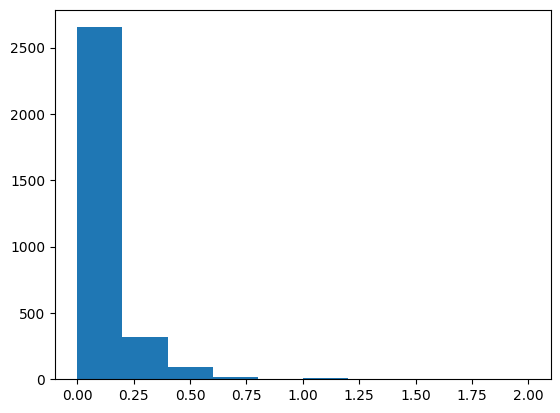

In [377]:


#gdfjoined = gpd.GeoDataFrame( data_filterall_pdm, geometry = 'geometry', crs="EPSG:2163")

#vmin, vmax = gdf.pct_food_insecure.min(), gdf.pct_food_insecure.max() #math.ceil(gdf.pct_food_insecure.max())
# Choose the continuous colorscale "YlOrBr" from https://matplotlib.org/stable/tutorials/colors/colormaps.html
#colormap = "YlOrBr"
#gdf = makeColorColumn(gdf,variable,vmin,vmax)
hfont = {'fontname':'Helvetica'}


# create figure and axes for with Matplotlib for main map
#fig, ax = plt.subplots(1, figsize=(10, 12))
# remove the axis box from the main map
#ax.axis('off')

scale1 = ScaleBar(
    dx= 1,
    label="Scale 1",
    location="lower right",  # in relation to the whole plot
    label_loc="left",
    scale_loc="bottom",  # in relation to the line
)

gdfjoined2['SBATotal'] = gdfjoined2['ApprovLoan_h'] + gdfjoined2['ApprovLoan_b']
gdfjoined2['HATotal'] = gdfjoined2['HAOAproved'] + gdfjoined2['HARAproved'] 

gdfjoined2['rates'] = gdfjoined2.apply(lambda x: x['DisastProjCount']/x['HazardDamageCount'] if x['HazardDamageCount'] != 0 else 0, axis=1)

plt.hist(gdfjoined2['rates'] )

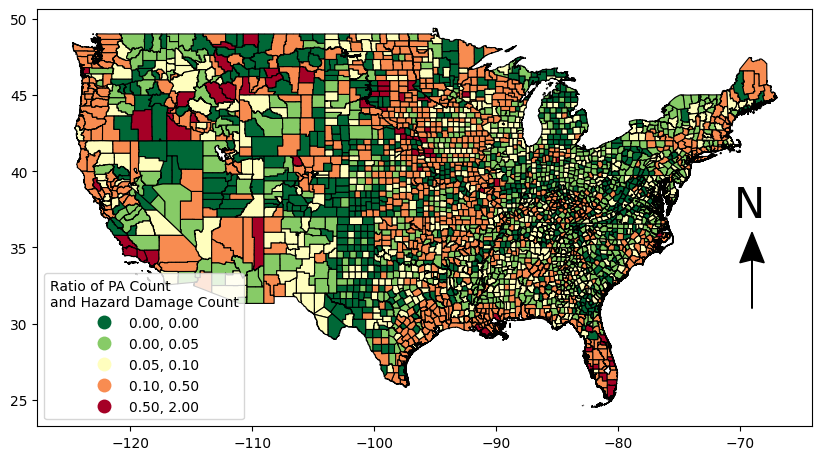

In [405]:


std_a1 = gdfjoined2[~gdfjoined2["State Name"].isin(['HAWAII','ALASKA', 'AMERICAN SAMOA', 'GUAM', 'PUERTO RICO', 'VIRGIN ISLANDS',
                                       'COMMONWEALTH OF THE NORTHERN MARIANA ISLANDS'])].plot(
                column="rates", scheme="UserDefined",
                cmap= 'RdYlGn_r',  legend=True,
                classification_kwds=dict(bins=[0.00, 0.05, 0.1, 0.5, 2]),
                
                legend_kwds={"loc": "lower left", "fmt" : "{:.2f}" , 
                                'title': "Ratio of PA Count\nand Hazard Damage Count",
                                #"labels" : ["0.00", "0.0-6.0e3", "6.0e3-9.5e5", "9.5e3-2.2e7", "2.2e7-4e12"],
                                #"bbox_to_anchor": (1.0, 0.1),
                                'fontsize': 10
                            },
                linewidth=0.8,
                edgecolor='black',
                figsize=(10, 12) )

#std_a1.text(x=90.1, y=22.28, s='Recovery Efficiency \n of sites (%)', fontsize=9.8)

#a= inset_axes(std_a1, width="0%", height='0%',loc='lower right')

std_a1.text(x= -75 + 4.5, y= 37, s='N', fontsize=30)
std_a1.arrow( -69, 31, 0, 5, length_includes_head=True,
          head_width= 2, head_length= 2, overhang=.1, facecolor='k')


#std_a1.text(x= -75 + 5, y= -1.8e6, s='Recovery Efficiency \n of sites (%)', fontsize=9.8)
#a.text(x=88.6, y=22.25, s='Study Area', fontsize=9.8)
#a.plot([88.9, 90, 90, 88.9, 88.9],[21.5, 21.5, 23, 23,21.5], lw=2)
#std_a1.set_xticks([])
#std_a1.set_yticks([])
#std_a1.add_artist(scale1)

plt.show()

In [185]:

""" ['index', 'STCOFIPS', 'State Name', 'STATEABBRV_x', 'County Name',
       'HazardCount', 'HMAprojAmot', 'HMApcount', 'HMAfedShaOb',
       'NumfinalProp', 'duration_years_x', 'CropDmg', 'CropDmg(ADJ 2021)',
       'CropDmgPerCapita(ADJ 2021)', 'PropertyDmg', 'HazardDamageCount',
       'PropertyDmg(ADJ 2021)', 'PropertyDmgPerCapita(ADJ 2021)', 'Injuries',
       'InjuriesPerCapita', 'Fatalities', 'FatalitiesPerCapita',
       'Duration_Days', 'Count_h', 'ApprovLoan_h', 'Count_b', 'ApprovLoan_b',
       'HAOCount', 'HAOAproved', 'HARCount', 'HARAproved', 'PAprojectAmt',
       'PApcount', 'PAfedshare', 'PAtotobl', 'NRI_ID', 'STATE', 'STATEABBRV_y',
       'STATEFIPS', 'COUNTY', 'COUNTYTYPE', 'COUNTYFIPS', 'POPULATION',
       'BUILDVALUE', 'AGRIVALUE', 'AREA', 'RISK_VALUE', 'RISK_SCORE',
       'RISK_RATNG', 'RISK_SPCTL', 'EAL_SCORE', 'EAL_RATNG', 'EAL_SPCTL',
       'EAL_VALT', 'EAL_VALB', 'EAL_VALP', 'EAL_VALPE', 'EAL_VALA', 'ALR_VALB',
       'ALR_VALP', 'ALR_VALA', 'ALR_NPCTL', 'SOVI_SCORE', 'SOVI_RATNG',
       'SOVI_SPCTL', 'RESL_SCORE', 'RESL_RATNG', 'RESL_SPCTL', 'RESL_VALUE',
       'geometry', 'fips_x', 'fips_y', 'state', 'county', 'PDMprojAmot',
       'PDMprojCount', 'PDMfedShaOb', 'PDMreciptAdm', 'PDMOblgdAmt',
       'PDMAdminCost', 'PDMNumfinalProp', 'PDMNumProperty', 'duration_years_y',
       'DisastProjCount'] """


std_a1 = gdfjoined2[~gdfjoined2["State Name"].isin(['HAWAII','ALASKA', 'AMERICAN SAMOA', 'GUAM', 'PUERTO RICO', 'VIRGIN ISLANDS',
                                       'COMMONWEALTH OF THE NORTHERN MARIANA ISLANDS'])].plot(
                column="rates", 
                scheme="Quantiles",
                cmap= 'RdYlGn_r',  legend=True,
                #classification_kwds=dict(bins=[0.00, 0.05, 0.1, 0.5, 2]),
                
                legend_kwds={"loc": "lower left", "fmt" : "{:.2f}" , 
                                'title': "Ratio of PA Count\nand Hazard Damage Count",
                                #"labels" : ["0.00", "0.0-6.0e3", "6.0e3-9.5e5", "9.5e3-2.2e7", "2.2e7-4e12"],
                                #"bbox_to_anchor": (1.0, 0.1),
                                'fontsize': 10
                            },
                linewidth=0.8,
                edgecolor='black',
                figsize=(10, 12) )

#std_a1.text(x=90.1, y=22.28, s='Recovery Efficiency \n of sites (%)', fontsize=9.8)

#a= inset_axes(std_a1, width="0%", height='0%',loc='lower right')

std_a1.text(x= -75 + 4.5, y= 37, s='N', fontsize=30)
std_a1.arrow( -69, 31, 0, 5, length_includes_head=True,
          head_width= 2, head_length= 2, overhang=.1, facecolor='k')


#std_a1.text(x= -75 + 5, y= -1.8e6, s='Recovery Efficiency \n of sites (%)', fontsize=9.8)
#a.text(x=88.6, y=22.25, s='Study Area', fontsize=9.8)
#a.plot([88.9, 90, 90, 88.9, 88.9],[21.5, 21.5, 23, 23,21.5], lw=2)
#std_a1.set_xticks([])
#std_a1.set_yticks([])
#std_a1.add_artist(scale1)

plt.show()

In [ ]:


from splot.esda import plot_local_autocorrelation
from esda.moran import Moran_Local_BV
from esda.moran import Moran_BV, Moran_Local_BV
from splot.esda import plot_moran_bv_simulation, plot_moran_bv
from splot.esda import moran_scatterplot



In [1]:
from esda.moran import (Moran, Moran_BV,
                        Moran_Local, Moran_Local_BV)


/Users/yuhan/opt/anaconda3/envs/hazard_env/lib/python3.11/site-packages/libpysal/cg/alpha_shapes.py:38: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/Users/yuhan/opt/anaconda3/envs/hazard_env/lib/python3.11/site-packages/libpysal/cg/alpha_shapes.py:164: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/Users/yuhan/opt/anaconda3/envs/hazard_env/lib/python

In [3]:

y1 = gdfjoined[ 'HMAprojAmot' ].values
w1 = Queen.from_dataframe( gdfjoined )

w1.transform = 'r'
x1 = (gdfjoined['PropertyDmg'] ).values
moran1 = Moran(y1, w1)
moran_bv1 = Moran_BV(y1, x1, w1)
moran_loc1 = Moran_Local(y1, w1)
moran_loc_bv1 = Moran_Local_BV(y1, x1, w1)

plot_local_autocorrelation(moran_loc_bv1, gdfjoined, 'HMAprojAmot')
plt.show()

NameError: name 'gdfjoined' is not defined

In [234]:
from splot.esda import lisa_cluster
moran_bv1

In [ ]:

lisa_cluster(moran_loc_bv1, gdfjoined, p=0.05, 
             legend_kwds={'loc': 'lower right',  'title': "Damage vs. HMA", 
                                                                'bbox_to_anchor': (1.1, 0.1),
                                                                'fontsize':'large' },
                                                                 figsize=(10, 12), )
plt.show()

In [196]:

y2 = gdfjoined[ 'PropertyDmg' ].values
w2 = Queen.from_dataframe( gdfjoined )

w2.transform = 'r'
x2 = (gdfjoined['ApprovLoan_h'] + gdfjoined['ApprovLoan_b'] ).values
moran2 = Moran(y2, w2)
moran_bv2 = Moran_BV(y2, x2, w2)
#moran_loc = Moran_Local(y2, w2)
moran_loc_bv2 = Moran_Local_BV(y2, x2, w2)


/Users/yuhan/opt/anaconda3/envs/hazard_env/lib/python3.11/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
 There are 4 islands with ids: 1187, 1193, 1835, 2945.
  warnings.warn(message)


('WARNING: ', 1187, ' is an island (no neighbors)')
('WARNING: ', 1193, ' is an island (no neighbors)')
('WARNING: ', 1835, ' is an island (no neighbors)')
('WARNING: ', 2945, ' is an island (no neighbors)')


(<Figure size 1000x1200 with 1 Axes>, <Axes: >)

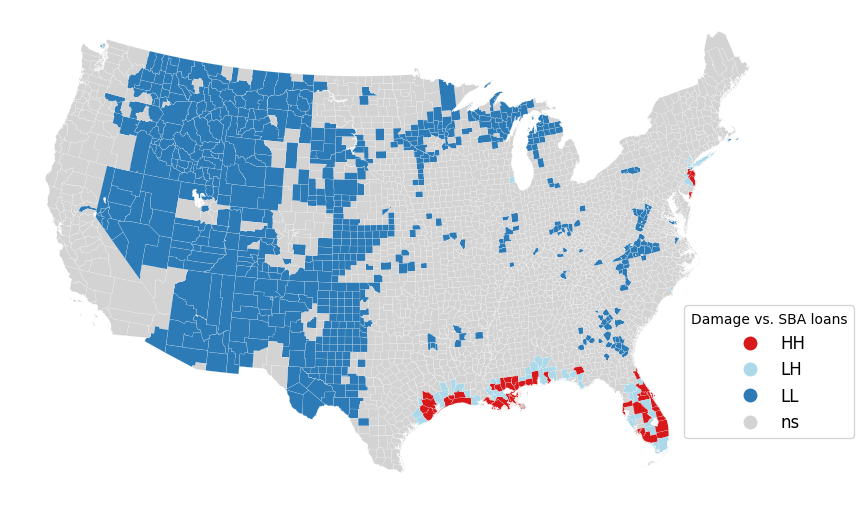

In [406]:

lisa_cluster(moran_loc_bv2, gdfjoined, p=0.05, 
             legend_kwds={'loc': 'lower right', "fmt" : "{:.2f}" , 
                           'title': "Damage vs. SBA loans", 
                           'bbox_to_anchor': (1.1, 0.1),
                            'fontsize':'large' },
                            figsize=(10, 12), )

In [198]:
y3 = gdfjoined['PropertyDmg'].values
w3 = Queen.from_dataframe( gdfjoined )

w3.transform = 'r'
x3 = (gdfjoined['HAOAproved'] + gdfjoined['HARAproved'] ).values
moran3 = Moran(y3, w3)
moran_bv3 = Moran_BV(y3, x3, w3)
#moran_loc = Moran_Local(y2, w2)
moran_loc_bv3 = Moran_Local_BV(y3, x3, w3)


/Users/yuhan/opt/anaconda3/envs/hazard_env/lib/python3.11/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
 There are 4 islands with ids: 1187, 1193, 1835, 2945.
  warnings.warn(message)


('WARNING: ', 1187, ' is an island (no neighbors)')
('WARNING: ', 1193, ' is an island (no neighbors)')
('WARNING: ', 1835, ' is an island (no neighbors)')
('WARNING: ', 2945, ' is an island (no neighbors)')


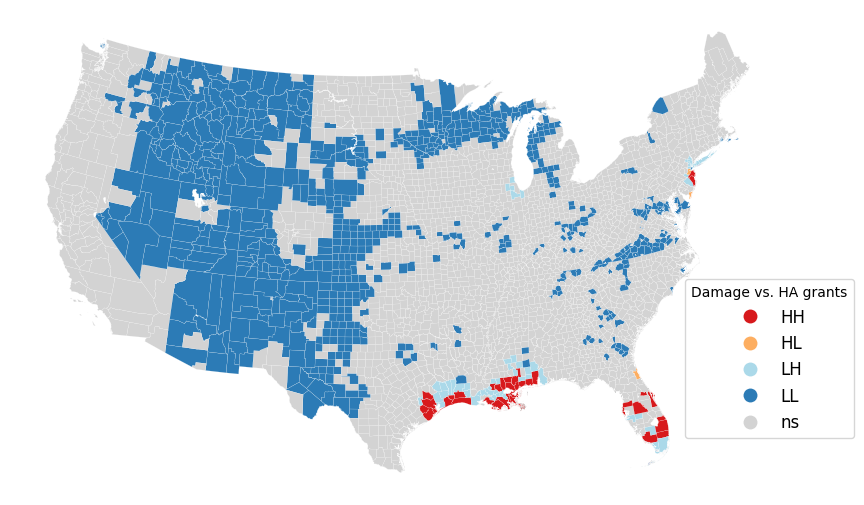

In [199]:


lisa_cluster(moran_loc_bv3, gdfjoined, p=0.05, 
             legend_kwds={'loc': 'lower right',  'title': "Damage vs. HA grants", 
                                                                'bbox_to_anchor': (1.1, 0.1),
                                                                'fontsize':'large' },
                                                                 figsize=(10, 12), )
plt.show()

In [200]:
y4 = gdfjoined['PropertyDmg'].values
w4 = Queen.from_dataframe( gdfjoined )

w4.transform = 'r'
x4 = ( gdfjoined['PAprojectAmt'] ).values
moran4 = Moran(y4, w4)
moran_bv4 = Moran_BV(y4, x4, w4)
#moran_loc = Moran_Local(y4, w4)
moran_loc_bv4 = Moran_Local_BV(y4, x4, w4)



/Users/yuhan/opt/anaconda3/envs/hazard_env/lib/python3.11/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
 There are 4 islands with ids: 1187, 1193, 1835, 2945.
  warnings.warn(message)


('WARNING: ', 1187, ' is an island (no neighbors)')
('WARNING: ', 1193, ' is an island (no neighbors)')
('WARNING: ', 1835, ' is an island (no neighbors)')
('WARNING: ', 2945, ' is an island (no neighbors)')


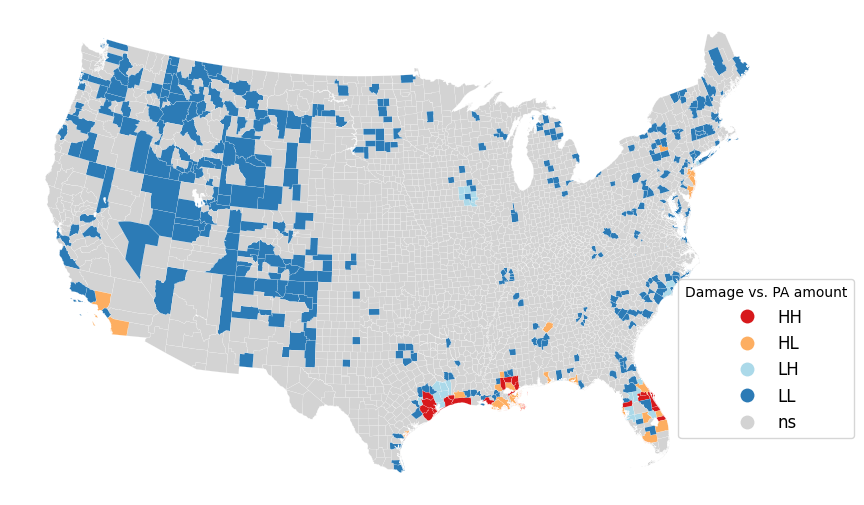

In [201]:

lisa_cluster(moran_loc_bv4, gdfjoined, p=0.05, 
             legend_kwds={'loc': 'lower right',  'title': "Damage vs. PA amount", 
                                                                'bbox_to_anchor': (1.1, 0.1),
                                                                'fontsize':'large' },
                                                                 figsize=(10, 12), )
plt.show()


In [202]:
gdfjoined['PDMprojAmot'] = gdfjoined['PDMprojAmot'].fillna(0)
y5 = gdfjoined['PropertyDmg'].values
w5 = Queen.from_dataframe( gdfjoined )

w5.transform = 'r'
x5 = ( gdfjoined['PDMprojAmot'] ).values
moran5 = Moran(y5, w5)
moran_bv5 = Moran_BV(y5, x5, w5)
#moran_loc = Moran_Local(y5, w5)
moran_loc_bv5 = Moran_Local_BV(y5, x5, w5)

/Users/yuhan/opt/anaconda3/envs/hazard_env/lib/python3.11/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
 There are 4 islands with ids: 1187, 1193, 1835, 2945.
  warnings.warn(message)


('WARNING: ', 1187, ' is an island (no neighbors)')
('WARNING: ', 1193, ' is an island (no neighbors)')
('WARNING: ', 1835, ' is an island (no neighbors)')
('WARNING: ', 2945, ' is an island (no neighbors)')


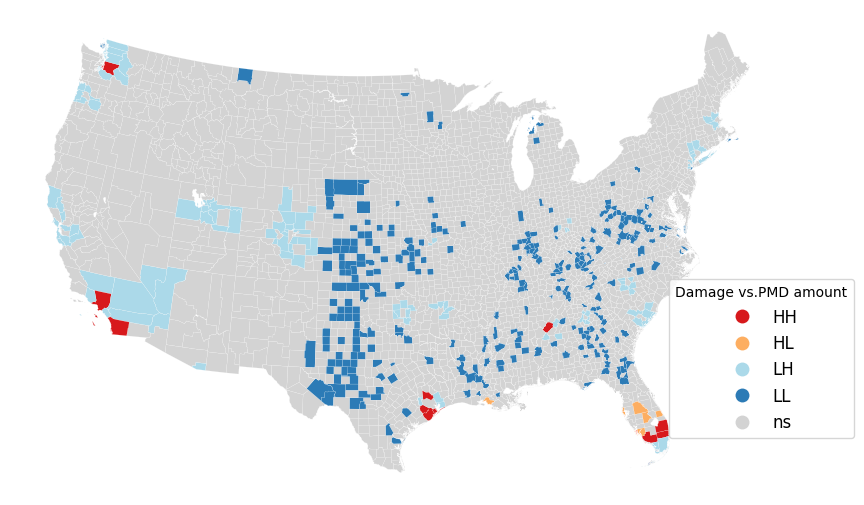

In [203]:

lisa_cluster(moran_loc_bv5, gdfjoined, p=0.05, 
             legend_kwds={'loc': 'lower right',  'title': "Damage vs.PMD amount", 
                                                                'bbox_to_anchor': (1.1, 0.1),
                                                                'fontsize':'large' },
                                                                 figsize=(10, 12), )
plt.show()

In [206]:

y12 = gdfjoined['SOVI_SCORE'].values
w12 = Queen.from_dataframe( gdfjoined )

w12.transform = 'r'
x12 = ( gdfjoined['HMAprojAmot'] ).values
moran12 = Moran(y12, w12)
moran_bv12 = Moran_BV(y12, x12, w12)
#moran_loc = Moran_Local(y12, w12)
moran_loc_bv12 = Moran_Local_BV(y12, x12, w12)

/Users/yuhan/opt/anaconda3/envs/hazard_env/lib/python3.11/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
 There are 4 islands with ids: 1187, 1193, 1835, 2945.
  warnings.warn(message)


('WARNING: ', 1187, ' is an island (no neighbors)')
('WARNING: ', 1193, ' is an island (no neighbors)')
('WARNING: ', 1835, ' is an island (no neighbors)')
('WARNING: ', 2945, ' is an island (no neighbors)')


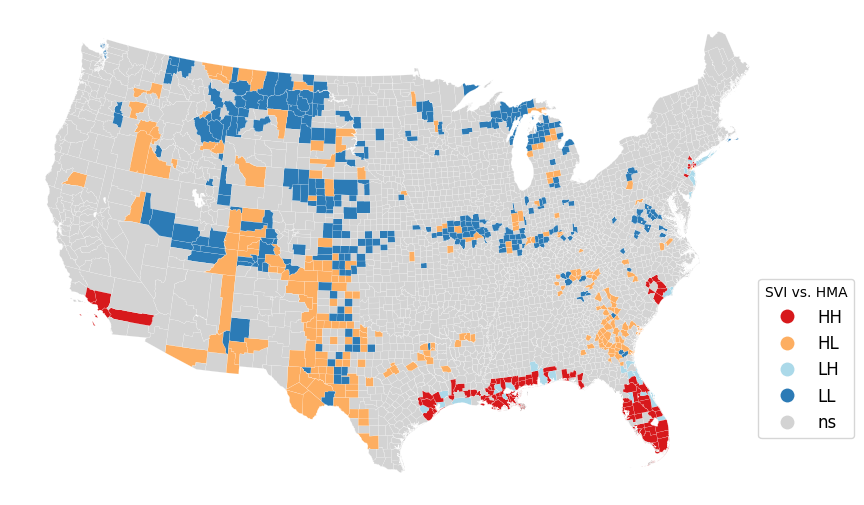

In [207]:

lisa_cluster(moran_loc_bv12, gdfjoined, p=0.05, 
             legend_kwds={'loc': 'lower right',  'title': "SVI vs. HMA", 
                                                                'bbox_to_anchor': (1.1, 0.1),
                                                                'fontsize':'large' },
                                                                 figsize=(10, 12), )
plt.show()

In [208]:

y22 = gdfjoined[ 'SOVI_SCORE' ].values
w22 = Queen.from_dataframe( gdfjoined )

w22.transform = 'r'
x22 = (gdfjoined['ApprovLoan_h'] + gdfjoined['ApprovLoan_b'] ).values
moran22 = Moran(y22, w22)
moran_bv22 = Moran_BV(y22, x22, w22)
#moran_loc = Moran_Local(y22, w22)
moran_loc_bv22 = Moran_Local_BV(y22, x22, w22)

/Users/yuhan/opt/anaconda3/envs/hazard_env/lib/python3.11/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
 There are 4 islands with ids: 1187, 1193, 1835, 2945.
  warnings.warn(message)


('WARNING: ', 1187, ' is an island (no neighbors)')
('WARNING: ', 1193, ' is an island (no neighbors)')
('WARNING: ', 1835, ' is an island (no neighbors)')
('WARNING: ', 2945, ' is an island (no neighbors)')


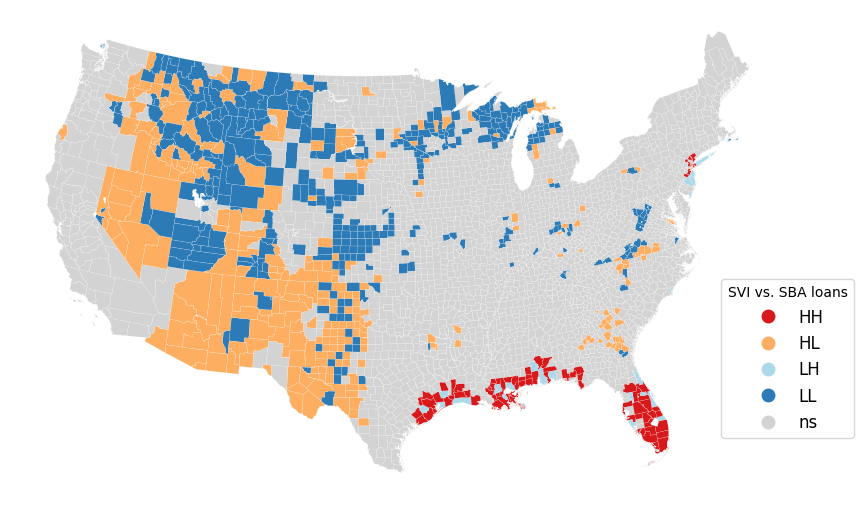

In [209]:
lisa_cluster(moran_loc_bv22, gdfjoined, p=0.05, 
             legend_kwds={'loc': 'lower right',  'title': "SVI vs. SBA loans", 
                                                                'bbox_to_anchor': (1.1, 0.1),
                                                                'fontsize':'large' },
                                                                 figsize=(10, 12), )
plt.show()

In [210]:
y32 = gdfjoined['SOVI_SCORE'].values
w32 = Queen.from_dataframe( gdfjoined )

w32.transform = 'r'
x32 = (gdfjoined['HAOAproved'] + gdfjoined['HARAproved'] ).values
moran32 = Moran(y32, w32)
moran_bv32 = Moran_BV(y32, x32, w32)
#moran_loc = Moran_Local(y3, w32)
moran_loc_bv32 = Moran_Local_BV(y32, x32, w32)

/Users/yuhan/opt/anaconda3/envs/hazard_env/lib/python3.11/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
 There are 4 islands with ids: 1187, 1193, 1835, 2945.
  warnings.warn(message)


('WARNING: ', 1187, ' is an island (no neighbors)')
('WARNING: ', 1193, ' is an island (no neighbors)')
('WARNING: ', 1835, ' is an island (no neighbors)')
('WARNING: ', 2945, ' is an island (no neighbors)')


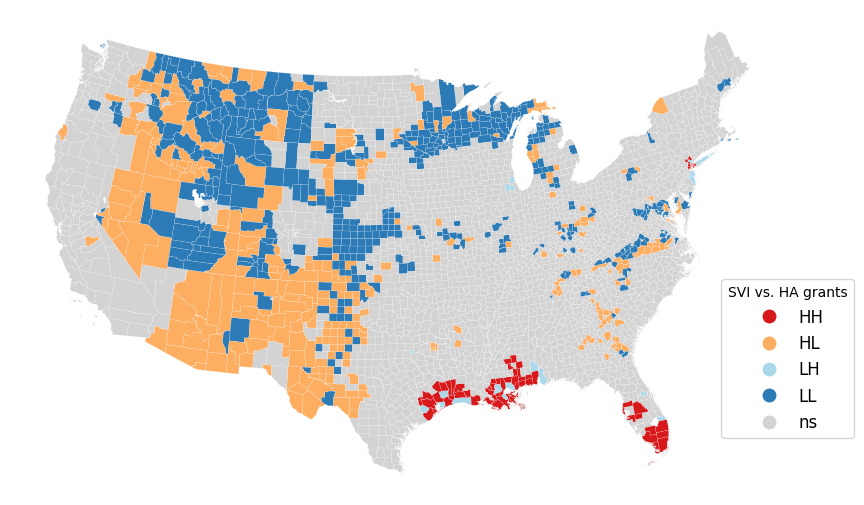

In [211]:
lisa_cluster(moran_loc_bv32, gdfjoined, p=0.05, 
             legend_kwds={'loc': 'lower right',  'title': "SVI vs. HA grants", 
                                                                'bbox_to_anchor': (1.1, 0.1),
                                                                'fontsize':'large' },
                                                                 figsize=(10, 12), )
plt.show()

In [212]:
y42 = gdfjoined['SOVI_SCORE'].values
w42 = Queen.from_dataframe( gdfjoined )

w42.transform = 'r'
x42 = ( gdfjoined['PAprojectAmt'] ).values
moran42 = Moran(y42, w42)
moran_bv42 = Moran_BV(y42, x42, w42)
#moran_loc = Moran_Local(y42, w42)
moran_loc_bv42 = Moran_Local_BV(y42, x42, w42)

/Users/yuhan/opt/anaconda3/envs/hazard_env/lib/python3.11/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
 There are 4 islands with ids: 1187, 1193, 1835, 2945.
  warnings.warn(message)


('WARNING: ', 1187, ' is an island (no neighbors)')
('WARNING: ', 1193, ' is an island (no neighbors)')
('WARNING: ', 1835, ' is an island (no neighbors)')
('WARNING: ', 2945, ' is an island (no neighbors)')


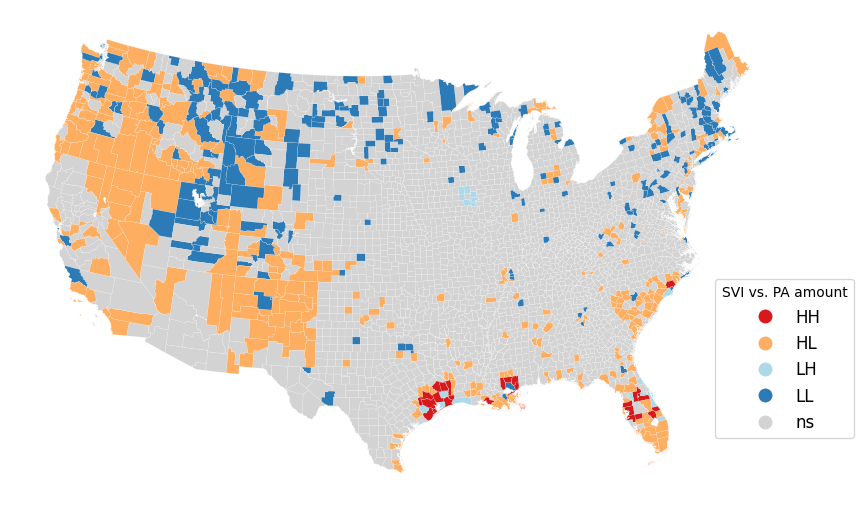

In [213]:
lisa_cluster(moran_loc_bv42, gdfjoined, p=0.05, 
             legend_kwds={'loc': 'lower right',  'title': "SVI vs. PA amount", 
                                                                'bbox_to_anchor': (1.1, 0.1),
                                                                'fontsize':'large' },
                                                                 figsize=(10, 12), )
plt.show()

In [214]:
y52 = gdfjoined['SOVI_SCORE'].values
w52 = Queen.from_dataframe( gdfjoined )

w52.transform = 'r'
x52 = ( gdfjoined['PDMprojAmot'] ).values
moran52 = Moran(y52, w52)
moran_bv52 = Moran_BV(y52, x52, w52)
#moran_loc = Moran_Local(y52, w52)
moran_loc_bv52 = Moran_Local_BV(y52, x52, w52)

/Users/yuhan/opt/anaconda3/envs/hazard_env/lib/python3.11/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
 There are 4 islands with ids: 1187, 1193, 1835, 2945.
  warnings.warn(message)


('WARNING: ', 1187, ' is an island (no neighbors)')
('WARNING: ', 1193, ' is an island (no neighbors)')
('WARNING: ', 1835, ' is an island (no neighbors)')
('WARNING: ', 2945, ' is an island (no neighbors)')


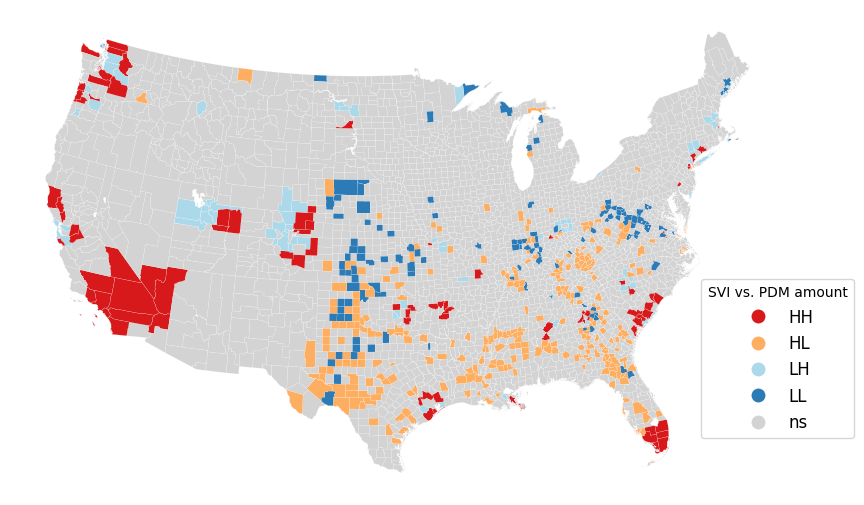

In [215]:
lisa_cluster(moran_loc_bv52, gdfjoined, p=0.05, 
             legend_kwds={'loc': 'lower right',  'title': "SVI vs. PDM amount", 
                                                                'bbox_to_anchor': (1.1, 0.1),
                                                                'fontsize':'large' },
                                                                 figsize=(10, 12), )
plt.show()

In [ ]:


df_final2 = df_final[ [ 'Hazard_u', 'Year',  'PropertyDmg' ] ].reset_index()
df_final2 = df_final2[ [ 'Hazard_u', 'Year', 'PropertyDmg' ] ]

df_final_pivot = df_final2.pivot_table(values= 'PropertyDmg', index='Year', columns='Hazard_u', aggfunc='sum', fill_value = 0)
#df_final_pivot.columns = [ 'Year', 'Year', 'CropDmg' ]
#print( df_final_pivot.columns, sep = '/n' )
df_final_pivot['Year'] = df_final_pivot.index
df_final_pivot.to_csv(r"/Users/yuhan/Desktop/df_final_pivot.csv", index= False)



df_final3 = df_final[ [ 'Hazard_u', 'Year',  'HMAprojAmot' ] ].reset_index()
df_final3 = df_final3[ [ 'Hazard_u', 'Year', 'HMAprojAmot' ] ]
df_final_pivot2 = df_final3.pivot_table(values= 'HMAprojAmot', index='Year', columns='Hazard_u', aggfunc='sum', fill_value = 0)
#df_final_pivot.columns = [ 'Year', 'Year', 'CropDmg' ]
#print( df_final_pivot.columns, sep = '/n' )
df_final_pivot2['Year'] = df_final_pivot2.index
df_final_pivot2.to_csv(r"/Users/yuhan/Desktop/df_final_pivot2.csv", index= False)


print(  df_final.loc[ (df_final[ 'PropertyDmg' ] > 0 ) & ( df_final[ 'HMAprojAmot' ] <= 0) ].shape )



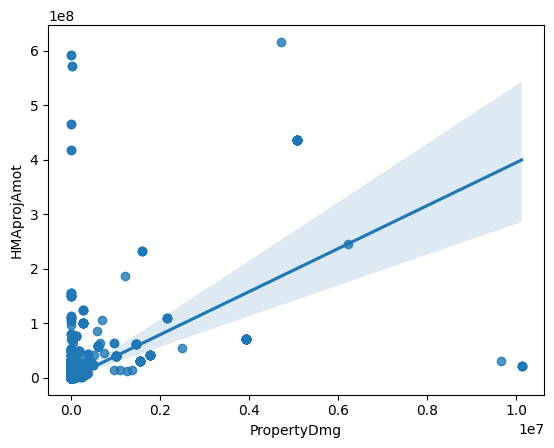

In [423]:
df_final2 = df_final.loc[ (df_final["PropertyDmg"] > 100) &
                          (df_final["HMAprojAmot"] > 100) & 
                          (df_final["PropertyDmg"] < 4e12) ]
_ = seaborn.regplot(x="PropertyDmg", y="HMAprojAmot", data= df_final)

In [179]:
#print( gdf.head() )
print( gdf.columns )

#print( gdf.PAfedshare.unique())

print( gdf.shape )


Index(['index', 'fips', 'geometry', 'HMAprojAmot', 'HMAfedShaOb',
       'NumfinalProp', 'duration_years', 'CropDmg', 'CropDmg(ADJ 2021)',
       'CropDmgPerCapita(ADJ 2021)', 'PropertyDmg', 'PropertyDmg(ADJ 2021)',
       'PropertyDmgPerCapita(ADJ 2021)', 'Injuries', 'InjuriesPerCapita',
       'Fatalities', 'FatalitiesPerCapita', 'Duration_Days', 'Count_h',
       'ApprovLoan_h', 'Count_b', 'ApprovLoan_b', 'HAOCount', 'HAOAproved',
       'HARCount', 'HARAproved', 'PAprojectAmt', 'PAfedshare', 'PAtotobl',
       'PopTot', 'MedHHInc', 'TotAge65', 'DEVEPLOW', 'DEVELPMED', 'DEVELPHIGH',
       'Unempolyme', 'BelPoverty', 'Minority', 'DEVELOPED', 'HMAshare',
       'PAshare'],
      dtype='object')
(3108, 41)


In [169]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import robust_scale


gdf.loc[gdf['HMAprojAmot'] > 0, 'HMAshare'] = gdf['HMAfedShaOb']/gdf['HMAprojAmot']
gdf.loc[gdf['PAprojectAmt'] > 0, 'PAshare'] = gdf['PAfedshare']/gdf['PAprojectAmt']


cluster_variables = [ 'CropDmgPerCapita(ADJ 2021)',  'PropertyDmgPerCapita(ADJ 2021)',  
                     'Duration_Days', 'Injuries', 'CropDmg(ADJ 2021)', 'CropDmg',
                     'PropertyDmg(ADJ 2021)',   'PropertyDmg',
                     'InjuriesPerCapita', 'Fatalities', 'FatalitiesPerCapita' ]

""" 'Count_h', 'ApprovLoan_h', 'Count_b', 'ApprovLoan_b', 
    'HAOCount', 'HAOAproved', 'HARCount', 'HARAproved', 
    'PAprojectAmt', 'PAshare''' """
""" cluster_variables = [
    'PopTot', 'MedHHInc', 'TotAge65', 'DEVEPLOW', 'DEVELPMED', 'DEVELPHIGH',
       'Unempolyme', 'BelPoverty', 'Minority', 'DEVELOPED'
] """



from sklearn.preprocessing import robust_scale

#gdf[cluster_variables] = gdf[cluster_variables].fillna(value = 0)

gdf_scaled = robust_scale( gdf[cluster_variables])


gdf_scaled.shape
print( len( gdf_scaled[1,] ) )
print( len( gdf_scaled[:,0] ) )

pca = PCA( n_components = 0.95 )
pca.fit( gdf_scaled )

print( pca.components_  )
print( pca.explained_variance_ )

#print( pca.score()	)

reduced = pca.transform( gdf_scaled )
print( reduced.shape )

11
3108


In [186]:
cluster_variables = [ 'Count_h' , 'ApprovLoan_h' , 'Count_b' , 'ApprovLoan_b' ]

""" 'Count_h', 'ApprovLoan_h', 'Count_b', 'ApprovLoan_b', 
    'HAOCount', 'HAOAproved', 'HARCount', 'HARAproved', 
    'PAprojectAmt', 'PAshare''' """
""" cluster_variables = [
    'PopTot', 'MedHHInc', 'TotAge65', 'DEVEPLOW', 'DEVELPMED', 'DEVELPHIGH',
       'Unempolyme', 'BelPoverty', 'Minority', 'DEVELOPED'
] """


#gdf[cluster_variables] = gdf[cluster_variables].fillna(value = 0)

gdf_scaled = robust_scale( gdf[cluster_variables])


gdf_scaled.shape

pca = PCA( n_components = 0.95 )
pca.fit( gdf_scaled )

print( pca.components_  )
print( pca.explained_variance_ )

#print( pca.score()	)

reduced = pca.transform( gdf_scaled )
print( reduced.shape )



[[0.01828281 0.59760088 0.03221549 0.80093763]]
[24524.58618116]
(3108, 1)


In [187]:
cluster_variables = [ 'HAOCount', 'HAOAproved',
       'HARCount', 'HARAproved' ]

""" 'Count_h', 'ApprovLoan_h', 'Count_b', 'ApprovLoan_b', 
    'HAOCount', 'HAOAproved', 'HARCount', 'HARAproved', 
    'PAprojectAmt', 'PAshare''' """
""" cluster_variables = [
    'PopTot', 'MedHHInc', 'TotAge65', 'DEVEPLOW', 'DEVELPMED', 'DEVELPHIGH',
       'Unempolyme', 'BelPoverty', 'Minority', 'DEVELOPED'
] """


#gdf[cluster_variables] = gdf[cluster_variables].fillna(value = 0)

gdf_scaled = robust_scale( gdf[cluster_variables])


gdf_scaled.shape

pca = PCA( n_components = 0.95 )
pca.fit( gdf_scaled )

print( pca.components_  )
print( pca.explained_variance_ )

#print( pca.score()	)

reduced = pca.transform( gdf_scaled )
print( reduced.shape )


[[0.03131255 0.11217727 0.3194603  0.94041528]]
[79833976.25614275]
(3108, 1)


In [ ]:

cluster_variables = [ 'PopTot', 'MedHHInc', 'TotAge65', 'DEVEPLOW', 'DEVELPMED', 'DEVELPHIGH',
       'Unempolyme', 'BelPoverty', 'Minority', 'DEVELOPED' ]

""" 'Count_h', 'ApprovLoan_h', 'Count_b', 'ApprovLoan_b', 
    'HAOCount', 'HAOAproved', 'HARCount', 'HARAproved', 
    'PAprojectAmt', 'PAshare''' """
""" cluster_variables = [
    'PopTot', 'MedHHInc', 'TotAge65', 'DEVEPLOW', 'DEVELPMED', 'DEVELPHIGH',
       'Unempolyme', 'BelPoverty', 'Minority', 'DEVELOPED'
] """


#gdf[cluster_variables] = gdf[cluster_variables].fillna(value = 0)

gdf_scaled = robust_scale( gdf[cluster_variables])


gdf_scaled.shape

pca = PCA( n_components = 0.8 )
pca.fit( gdf_scaled )

print( pca.components_  )
print( pca.explained_variance_ )

#print( pca.score()	)

reduced = pca.transform( gdf_scaled )
print( reduced.shape )


In [198]:
cluster_variables = [ 'PAprojectAmt', 'PAfedshare', 'PAtotobl' ]

""" 'Count_h', 'ApprovLoan_h', 'Count_b', 'ApprovLoan_b', 
    'HAOCount', 'HAOAproved', 'HARCount', 'HARAproved', 
    'PAprojectAmt', 'PAshare''' """
""" cluster_variables = [
    'PopTot', 'MedHHInc', 'TotAge65', 'DEVEPLOW', 'DEVELPMED', 'DEVELPHIGH',
       'Unempolyme', 'BelPoverty', 'Minority', 'DEVELOPED'
] """


#gdf[cluster_variables] = gdf[cluster_variables].fillna(value = 0)

gdf_scaled = robust_scale( gdf[cluster_variables])


gdf_scaled.shape

pca = PCA( n_components = 0.8 )
pca.fit( gdf_scaled )

print( pca.components_  )
print( pca.explained_variance_ )

#print( pca.score()	)

reduced = pca.transform( gdf_scaled )
print( reduced.shape )


[[0.47900255 0.62440919 0.61698438]]
[6.23883071e+08]
(3108, 1)


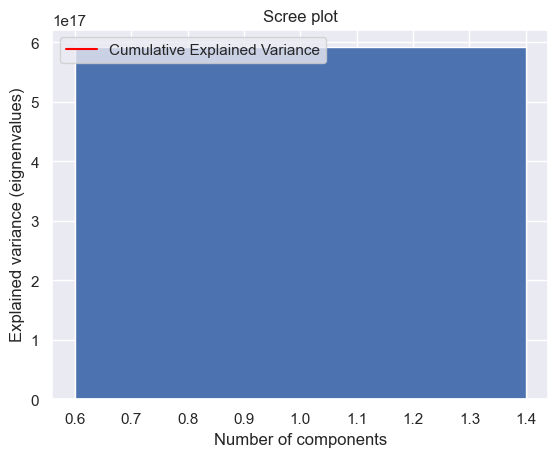

In [180]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.decomposition import PCA


sns.set()
 
# Reduce from 4 to 3 features with PCA
pca = PCA( n_components = 0.95 )
 
# Fit and transform data
reduced_features = pca.fit_transform( gdf_scaled )
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_),
    c='red',
    label='Cumulative Explained Variance')
 
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')
 
plt.show()


In [181]:
print( gdf_scaled )

[[ 8.90745000e+00  3.34418022e+00  3.00000000e+00 ...  2.10000000e-04
   9.00000000e+00  1.50000000e-04]
 [ 0.00000000e+00  8.24759248e+00  3.50000000e+00 ...  5.00000000e-05
   1.80000000e+01  1.30000000e-04]
 [ 0.00000000e+00  2.35475746e-02  1.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00 -4.50637295e-03 -2.50000000e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -4.50637295e-03 -2.50000000e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -4.50637295e-03 -2.50000000e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


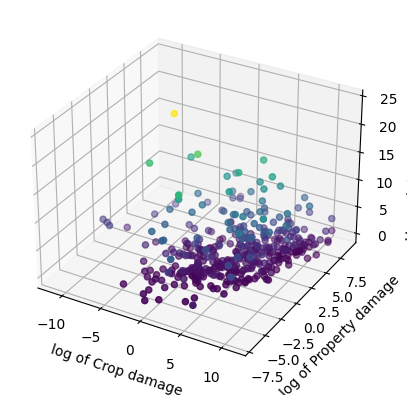

In [182]:
import numpy as np
import matplotlib.pyplot as plt
 
from mpl_toolkits import mplot3d
plt.style.use('default')
 
# Prepare 3D graph
fig = plt.figure()
ax = plt.axes(projection='3d')
 
# Plot scaled features
xdata = np.log( gdf_scaled[:,0] )
ydata = np.log( gdf_scaled[:,1] )
zdata = gdf_scaled[:,2]
 
# Plot 3D plot
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')
 
# Plot title of graph
#plt.title(f'3D Scatter')
 
# Plot x, y, z even ticks
#ticks = np.linspace(-3, 3, num=5)
#ax.set_xticks(ticks)
#ax.set_yticks(ticks)
#ax.set_zticks(ticks)
 
# Plot x, y, z labels
ax.set_xlabel('log of Crop damage', rotation=150)
ax.set_ylabel('log of Property damage')
ax.set_zlabel('Hazard duration (days)', rotation= 60)
plt.show()

In [183]:

_ = seaborn.pairplot(    gdf[cluster_variables], kind="reg", diag_kind="kde"  )

Error in callback <function flush_figures at 0x2a84923e0> (for post_execute):


KeyboardInterrupt: 

In [184]:
from linearmodels import PanelOLS
from linearmodels import RandomEffects
import statsmodels.api as sm


cluster_variables = [ 'HMAprojAmot',  'CropDmg', 'CropDmg(ADJ 2021)',
'CropDmgPerCapita(ADJ 2021)', 'PropertyDmg', 'PropertyDmg(ADJ 2021)',
'PropertyDmgPerCapita(ADJ 2021)', 'Injuries', 'InjuriesPerCapita',
'Fatalities', 'FatalitiesPerCapita', 'Duration_Days' ]

gdf_scaled = robust_scale( gdf[cluster_variables])

gdf_scaled.shape
print( len( gdf_scaled[1,] ) )
print( len( gdf_scaled[:,0] ) )


['HMAprojAmot', 'HMAfedShaOb',
'NumfinalProp', 'duration_years', 'CropDmg', 'CropDmg(ADJ 2021)',
'CropDmgPerCapita(ADJ 2021)', 'PropertyDmg', 'PropertyDmg(ADJ 2021)',
'PropertyDmgPerCapita(ADJ 2021)', 'Injuries', 'InjuriesPerCapita',
'Fatalities', 'FatalitiesPerCapita', 'Duration_Days', 'Count_h',
'ApprovLoan_h', 'Count_b', 'ApprovLoan_b', 'HAOCount', 'HAOAproved',
'HARCount', 'HARAproved', 'PAprojectAmt', 'PAfedshare', 'PAtotobl',
'PopTot', 'MedHHInc', 'TotAge65', 'DEVEPLOW', 'DEVELPMED', 'DEVELPHIGH',
'Unempolyme', 'BelPoverty', 'Minority', 'DEVELOPED']


model = sm.OLS( gdf_scaled[:, 0], gdf_scaled[:, 1:12 ] )
results2 = model.fit()

#print(results2.summary())

print( gdf.columns )
mod = PanelOLS.from_formula("HMAprojAmot ~ CropDmg + PropertyDmg + Injuries + InjuriesPerCapita + Fatalities + FatalitiesPerCapita + Duration_Days",
                            data= gdf.set_index([ "Year"]))

result = mod.fit(cov_type='clustered', cluster_entity=True)
result.summary.tables[1]

12
3108
Index(['index', 'fips', 'geometry', 'HMAprojAmot', 'HMAfedShaOb',
       'NumfinalProp', 'duration_years', 'CropDmg', 'CropDmg(ADJ 2021)',
       'CropDmgPerCapita(ADJ 2021)', 'PropertyDmg', 'PropertyDmg(ADJ 2021)',
       'PropertyDmgPerCapita(ADJ 2021)', 'Injuries', 'InjuriesPerCapita',
       'Fatalities', 'FatalitiesPerCapita', 'Duration_Days', 'Count_h',
       'ApprovLoan_h', 'Count_b', 'ApprovLoan_b', 'HAOCount', 'HAOAproved',
       'HARCount', 'HARAproved', 'PAprojectAmt', 'PAfedshare', 'PAtotobl',
       'PopTot', 'MedHHInc', 'TotAge65', 'DEVEPLOW', 'DEVELPMED', 'DEVELPHIGH',
       'Unempolyme', 'BelPoverty', 'Minority', 'DEVELOPED', 'HMAshare',
       'PAshare'],
      dtype='object')


KeyError: "None of ['Year'] are in the columns"

In [118]:

exog_vars = [ 'HMAprojAmot', 'HMAfedShaOb',
'NumfinalProp', 'duration_years', 'Count_h',
'ApprovLoan_h', 'Count_b', 'ApprovLoan_b', 'HAOCount', 'HAOAproved',
'HARCount', 'HARAproved', 'PAprojectAmt', 'PAfedshare', 'PAtotobl',
'PopTot', 'MedHHInc', 'TotAge65', 'DEVEPLOW', 'DEVELPMED', 'DEVELPHIGH',
'Unempolyme', 'BelPoverty', 'Minority', 'DEVELOPED' ]

exog = sm.add_constant(data[exog_vars])
mod = RandomEffects( gdf_scaled[:,1], exog)
re_res = mod.fit()
print(re_res)


NameError: name 'data' is not defined

In [4]:

gdfjoined = gpd.read_file( r"/Users/yuhan/Desktop/export_results/df_hazard_aggfips.shp" )


In [5]:
print( gdfjoined.crs )
#gdfjoined = gdfjoined.to_crs({'init':'epsg:2163'})


EPSG:2163


In [7]:

gdfjoined.columns


Index(['index', 'STCOFIPS', 'State Name', 'STATEABBRV', 'County Nam',
       'HazardCoun', 'HMAprojAmo', 'HMApcount', 'HMAfedShaO', 'NumfinalPr',
       'duration_y', 'CropDmg', 'CropDmg(AD', 'CropDmgPer', 'PropertyDm',
       'HazardDama', 'Property_1', 'Property_2', 'Injuries', 'InjuriesPe',
       'Fatalities', 'Fataliti_1', 'Duration_D', 'Count_h', 'ApprovLoan',
       'Count_b', 'ApprovLo_1', 'HAOCount', 'HAOAproved', 'HARCount',
       'HARAproved', 'PAprojectA', 'PApcount', 'PAfedshare', 'PAtotobl',
       'NRI_ID', 'STATE', 'STATEABB_1', 'STATEFIPS', 'COUNTY', 'COUNTYTYPE',
       'COUNTYFIPS', 'POPULATION', 'BUILDVALUE', 'AGRIVALUE', 'AREA',
       'RISK_VALUE', 'RISK_SCORE', 'RISK_RATNG', 'RISK_SPCTL', 'EAL_SCORE',
       'EAL_RATNG', 'EAL_SPCTL', 'EAL_VALT', 'EAL_VALB', 'EAL_VALP',
       'EAL_VALPE', 'EAL_VALA', 'ALR_VALB', 'ALR_VALP', 'ALR_VALA',
       'ALR_NPCTL', 'SOVI_SCORE', 'SOVI_RATNG', 'SOVI_SPCTL', 'RESL_SCORE',
       'RESL_RATNG', 'RESL_SPCTL', 'RESL_VALUE', 'fi

In [10]:
gdfjoined["totalAsst"] = gdfjoined["PDMprojAmo"] + gdfjoined["ApprovLoan"] + gdfjoined["ApprovLo_1"] + gdfjoined["HAOAproved"] + gdfjoined["HARAproved"] + gdfjoined["PAprojectA"] + gdfjoined["HMAprojAmo"]


<Axes: >

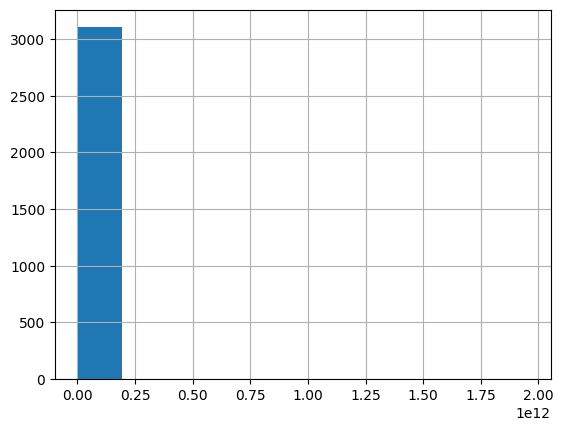

In [11]:

gdfjoined["totalAsst"].hist()

In [14]:
gdfjoined = gpd.GeoDataFrame( gdfjoined, geometry = 'geometry', crs="EPSG:2163")

gdfjoined.to_file(r"/Users/yuhan/Desktop/export_results/df_hazard_aggfips.shp")
 

In [9]:
gdfjoined[ [ "ApprovLoan" , "ApprovLo_1" , "HAOAproved" , "HARAproved" ]]

,ApprovLoan,ApprovLo_1,HAOAproved,HARAproved
0,9.238000e+05,239900.0,5.141423e+06,2.546120e+06
1,1.142159e+09,435447900.0,6.755320e+08,3.192122e+08
2,1.048000e+05,0.0,0.000000e+00,2.175617e+05
3,4.153800e+06,126400.0,2.059862e+07,3.951141e+06
4,9.332800e+06,6230200.0,4.466051e+07,8.717123e+06
...,...,...,...,...
3105,0.000000e+00,0.0,0.000000e+00,0.000000e+00
3106,0.000000e+00,0.0,0.000000e+00,0.000000e+00
3107,0.000000e+00,0.0,0.000000e+00,0.000000e+00
3108,0.000000e+00,0.0,0.000000e+00,0.000000e+00
